In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import AlgoLoop
import StatisticFunc

plt.style.use('Solarize_Light2')                     # 绘图风格
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 字体雅黑
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False    # 处理负号

# 预处理

## 提取并处理数据

### 各种利率

In [2]:
# GC007 利率
GCRates = pd.read_excel(io="Raw/GC007利率.xlsx")           #  读取数据
GCRates = GCRates.drop([0, 1, 2], axis=0)                   # 删除多余行
GCRates.columns = ['日期', 'GC007']                        # 修改列名
GCRates["日期"] = pd.DatetimeIndex(GCRates["日期"])           # 类型转换
GCRates = GCRates.set_index("日期")                          # 设置索引

In [3]:
# 10年国债收益率
CNRates = pd.read_excel(io="Raw/中债国债到期收益率(中债)(日).xls")        # 读取数据
CNRates.columns = ['日期', '十年国债收益率']                             # 修改列名
CNRates = CNRates.drop([0, 3870, 3871], axis=0)                       # 删除多余行
CNRates["日期"] = pd.DatetimeIndex(CNRates["日期"])                    # 类型转换
CNRates = CNRates.set_index("日期")                                   # 设置索引

In [4]:
# 10年美债收益率
USRates = pd.read_excel(io="Raw/美债收益率.xlsx")                       # 读取数据
USRates.columns = ['日期', '十年美债收益率']                             # 修改列名
USRates = USRates.drop([0, 6263, 6264], axis=0)                       # 删除多余行
USRates["日期"] = pd.DatetimeIndex(USRates["日期"])                    # 类型转换
USRates = USRates.set_index("日期")                                    # 设置索引

In [5]:
# 合并利率
Rates = GCRates.merge(CNRates, how='left', left_index=True, right_index=True)
Rates = Rates.merge(USRates, how='left', left_index=True, right_index=True)

In [6]:
Rates

,GC007,十年国债收益率,十年美债收益率
日期,,,
2008-01-02,3,4.4363,3.91
2008-01-03,2.815,4.4263,3.91
2008-01-04,2.85,4.4013,3.88
2008-01-07,2.7,4.3948,3.86
2008-01-08,2,4.4024,3.86
...,...,...,...
2020-06-19,2.87,2.8752,0.7
2020-06-22,3.135,2.9153,0.71
2020-06-23,3.015,2.9127,0.72


### 权益类资产换手率

In [7]:
Turnovers = pd.read_excel(io="Raw/资产换手率.xlsx")                         # 读取数据
Turnovers = Turnovers.drop([0], axis=0)                                   # 删除多余行
Turnovers["日期"] = pd.DatetimeIndex(Turnovers["日期"])                    # 类型转换
Turnovers = Turnovers.set_index("日期")                                   # 设置索引

In [8]:
# 时间对齐
Turnovers = Turnovers.loc[Rates.index, :]

### 铁矿石价格指数

In [9]:
IronStone = pd.read_excel(io="Raw/铁矿石价格指数.xls")                       # 读取数据
IronStone = IronStone.drop([0, 2642, 2643], axis=0)                       # 删除多余行
IronStone.columns=['日期', '铁矿石期货']                                     # 修改列名
IronStone["日期"] = pd.DatetimeIndex(IronStone["日期"])                    # 类型转换
IronStone = IronStone.set_index("日期")                                   # 设置索引

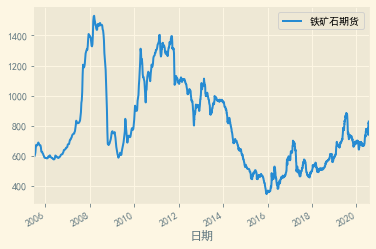

In [10]:
IronStone.plot()

### 各资产收盘价

In [11]:
Assets = pd.read_excel(io="Raw/资产收盘价.xlsx")                      # 读取数据
Assets = Assets.drop([0], axis=0)                                   # 删除多余行
Assets["日期"] = pd.DatetimeIndex(Assets["日期"])                    # 类型转换
Assets = Assets.set_index("日期")                                   # 设置索引
Assets = Assets.loc[Rates.index, :]                                # 时间对齐

In [12]:
# 整合铁矿石数据
Assets = Assets.drop('中信证券铁矿石', axis=1)
Assets = Assets.merge(IronStone, how='left', left_index=True, right_index=True)

# 填充铁矿石2011年前缺失数据
Assets['铁矿石期货'] = Assets['铁矿石期货'].fillna(method='bfill')
Assets

,沪深300,中证500,上证10年国债,信用债3-5AAA,中信证券COMEX铜期货,中信证券COMEX黄金期货,中信证券WTI原油期货,标普500,铁矿石期货
日期,,,,,,,,,
2008-01-02,5385.1,5123.93,NaN,99.689,7657.43,9302.4,10694.4,1447.16,1390.39
2008-01-03,5422.03,5230.75,NaN,99.529,7943.2,9372.37,10614.9,1447.16,1390.39
2008-01-04,5483.65,5243.03,NaN,99.568,7867.64,9336.21,10479.6,1411.63,1390.39
2008-01-07,5556.59,5347.81,NaN,99.585,7817.5,9285.58,10166,1416.18,1391.00
2008-01-08,5528.05,5200.55,NaN,99.448,8220.33,9495.24,10312.2,1390.19,1391.00
...,...,...,...,...,...,...,...,...,...
2020-06-19,4098.71,5787.15,148.603,200.598,5072.06,15459.5,746.671,3097.74,773.80
2020-06-22,4102.05,5784.03,148.558,200.394,5135.16,15567.2,763.025,3117.86,773.60
2020-06-23,4121.79,5804.34,148.342,200.015,5132.65,15661.6,754.211,3131.29,769.90


### 十年国债&美债价格指数

In [13]:
HoldPeriod = (Assets.index - Assets.index[0]).days

# 计算十年国债
Assets['10年国债'] = 100 - (Rates['十年国债收益率'] - 3.0) * 8.2 + 3.0 * HoldPeriod / 365.0
Assets['10年国债'] = Assets['10年国债'].fillna(method='ffill')

#计算十年美债
Assets['10年美债'] = 100 - (Rates['十年美债收益率'] - 3.0) * 8.2 + 3.0 * HoldPeriod / 365.0
Assets['10年美债'] = Assets['10年美债'].fillna(method='ffill')

In [14]:
# 替换上证十年国债指数
Assets = Assets.drop('上证10年国债', axis=1)
Assets

,沪深300,中证500,信用债3-5AAA,中信证券COMEX铜期货,中信证券COMEX黄金期货,中信证券WTI原油期货,标普500,铁矿石期货,10年国债,10年美债
日期,,,,,,,,,,
2008-01-02,5385.1,5123.93,99.689,7657.43,9302.4,10694.4,1447.16,1390.39,88.222340,92.538000
2008-01-03,5422.03,5230.75,99.529,7943.2,9372.37,10614.9,1447.16,1390.39,88.312559,92.546219
2008-01-04,5483.65,5243.03,99.568,7867.64,9336.21,10479.6,1411.63,1390.39,88.525778,92.800438
2008-01-07,5556.59,5347.81,99.585,7817.5,9285.58,10166,1416.18,1391.00,88.603736,92.989096
2008-01-08,5528.05,5200.55,99.448,8220.33,9495.24,10312.2,1390.19,1391.00,88.549635,92.997315
...,...,...,...,...,...,...,...,...,...,...
2020-06-19,4098.71,5787.15,200.598,5072.06,15459.5,746.671,3097.74,773.80,138.437059,156.273699
2020-06-22,4102.05,5784.03,200.394,5135.16,15567.2,763.025,3117.86,773.60,138.132896,156.216356
2020-06-23,4121.79,5804.34,200.015,5132.65,15661.6,754.211,3131.29,769.90,138.162435,156.142575


### 美元汇率

In [15]:
FXRates = pd.read_excel(io="Raw/美元汇率.xlsx")
FXRates = FXRates.drop([0, 1, 2], axis=0)
FXRates.columns = ['日期', '美元汇率']                        
FXRates["日期"] = pd.DatetimeIndex(FXRates["日期"])
FXRates = FXRates.set_index("日期")

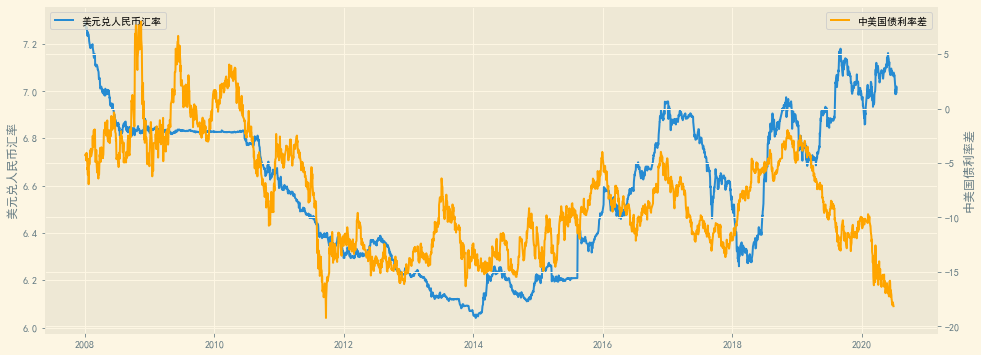

In [16]:
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(111)
ax1.plot(FXRates.index, FXRates['美元汇率'], label='美元兑人民币汇率')
ax1.set_ylabel('美元兑人民币汇率')
ax1.legend(loc='upper left')

ax2 = ax1.twinx() 
ax2.plot(Assets.index, (Assets['10年国债'] - Assets['10年美债']).values, color='orange', label='中美国债利率差')
ax2.set_ylabel('中美国债利率差')
ax2.set_xlabel('时间')
ax2.legend(loc='upper right')

plt.show()


In [17]:
# 皮尔逊相关系数
np.corrcoef( FXRates.values.flatten().astype(np.float32)[900:-233], 
             (Assets['10年国债'] - Assets['10年美债']).values.astype(np.float32)[900:-220] )

array([[1.        , 0.64462567],
       [0.64462567, 1.        ]])

## 计算各资产收益率

### 日内损益

- 去除WTI原油期货
- 去除COMEX铜期货
- 去除铁矿石期货

In [18]:
Returns = Assets.pct_change(axis=0)
Returns = Returns.dropna(axis=0, how='all')           # 删除无数据日

### 累计损益

In [19]:
cumReturns = (1.0 + Returns)
cumReturns = cumReturns.fillna(1.0)                    # 填充空值
cumReturns = cumReturns.cumprod()                      # 计算各资产累计收益率

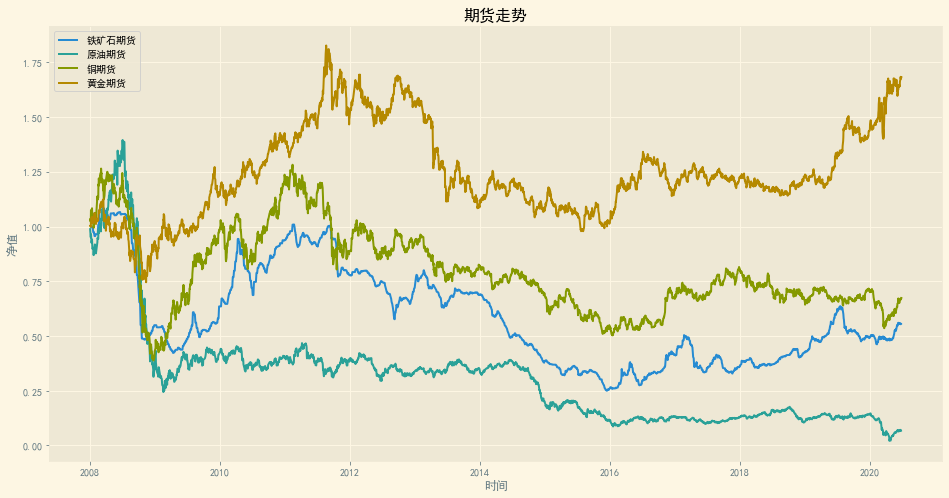

In [20]:
fig = plt.figure(figsize=(16, 8))

plt.plot(cumReturns.index, cumReturns['铁矿石期货'], label='铁矿石期货')
plt.plot(cumReturns.index, cumReturns['中信证券WTI原油期货'], label='原油期货')    
plt.plot(cumReturns.index, cumReturns['中信证券COMEX铜期货'], label='铜期货')
plt.plot(cumReturns.index, cumReturns['中信证券COMEX黄金期货'], label='黄金期货')

plt.xlabel('时间')
plt.ylabel('净值')
plt.legend(loc='upper left')
plt.title('期货走势')
plt.savefig('Pics/期货走势.png')


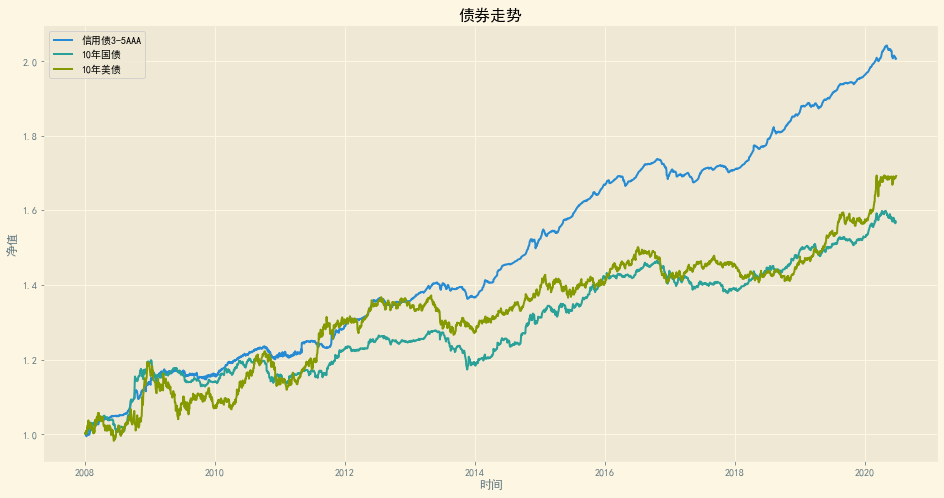

In [21]:
fig = plt.figure(figsize=(16, 8))

plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], label='信用债3-5AAA')
plt.plot(cumReturns.index, cumReturns['10年国债'], label='10年国债')    
plt.plot(cumReturns.index, cumReturns['10年美债'], label='10年美债')

plt.xlabel('时间')
plt.ylabel('净值')
plt.legend(loc='upper left')
plt.title('债券走势')
plt.savefig('Pics/债券走势.png')


### 杠杆调整后的债券净值

In [22]:
lever = 2.0                                 # 杠杆（额外）
leverReturns = Returns.copy()               # 创建副本 
leverCumReturns = cumReturns.copy()   

In [23]:
# 更新杠杆调整后的债券净值
leverReturns['10年国债'] = Returns['10年国债'] * (1.0 + lever) - Rates.loc[Returns.index, 'GC007'] * lever / (365.0 * 100)
leverReturns['信用债3-5AAA'] = Returns['信用债3-5AAA'] * (1.0 + lever) - Rates.loc[Returns.index, 'GC007'] * lever / (365.0 * 100)

# 更新累计净值
leverCumReturns = (1.0 + leverReturns)
leverCumReturns = leverCumReturns.fillna(1.0)                    # 填充空值
leverCumReturns = leverCumReturns.cumprod()                      # 计算各资产累计收益率

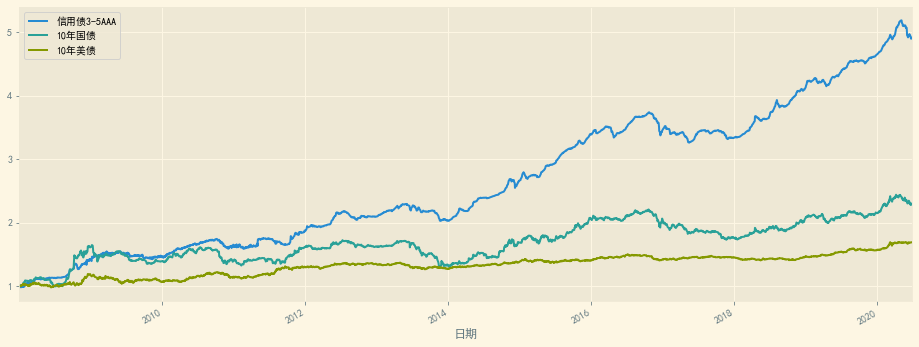

In [24]:
leverCumReturns[['信用债3-5AAA', '10年国债', '10年美债']].plot(figsize=(16, 6))

# 指数平均的效果

## 模型A：国内全资产（无指数平均）

In [25]:
leverReturns_A  = leverReturns.drop(['标普500', '10年美债'], axis=1)
leverCumReturns_A = leverCumReturns.drop(['标普500', '10年美债'], axis=1)

### 程序运行

In [26]:
tradeDF_A, weightDF_A = AlgoLoop.AlgoTrade(Assets, leverReturns_A, leverCumReturns_A, Turnovers, FXRates, mode='plain')

In [96]:
tradeDF_A.tail()

,沪深300,中证500,信用债3-5AAA,中信证券COMEX铜期货,中信证券COMEX黄金期货,中信证券WTI原油期货,铁矿石期货,10年国债,投资组合净值,最大回撤,仓位调整,最长不创新高时间
日期,,,,,,,,,,,,
2020-06-19,6425.26,6538.5,4175.31,1890.57,0,965.579,2820.51,3041.84,25857.569139,0.000000,0.0,0.0
2020-06-22,6430.49,6534.98,4161.84,1914.1,0,986.729,2819.78,3021.27,25869.175754,0.000000,0.0,0.0
2020-06-23,6461.45,6557.93,4137.54,1913.16,0,975.33,2806.3,3022.7,25874.402112,0.000000,0.0,0.0
2020-06-24,6488.4,6540.7,4134.6,1902.14,0,916.805,2806.3,3050.24,25839.183147,-0.001361,0.0,1.0
2020-06-29,6442.51,6510.58,4149.3,1934.11,0,961.003,2828.53,3049.62,25875.654819,0.000000,0.0,0.0


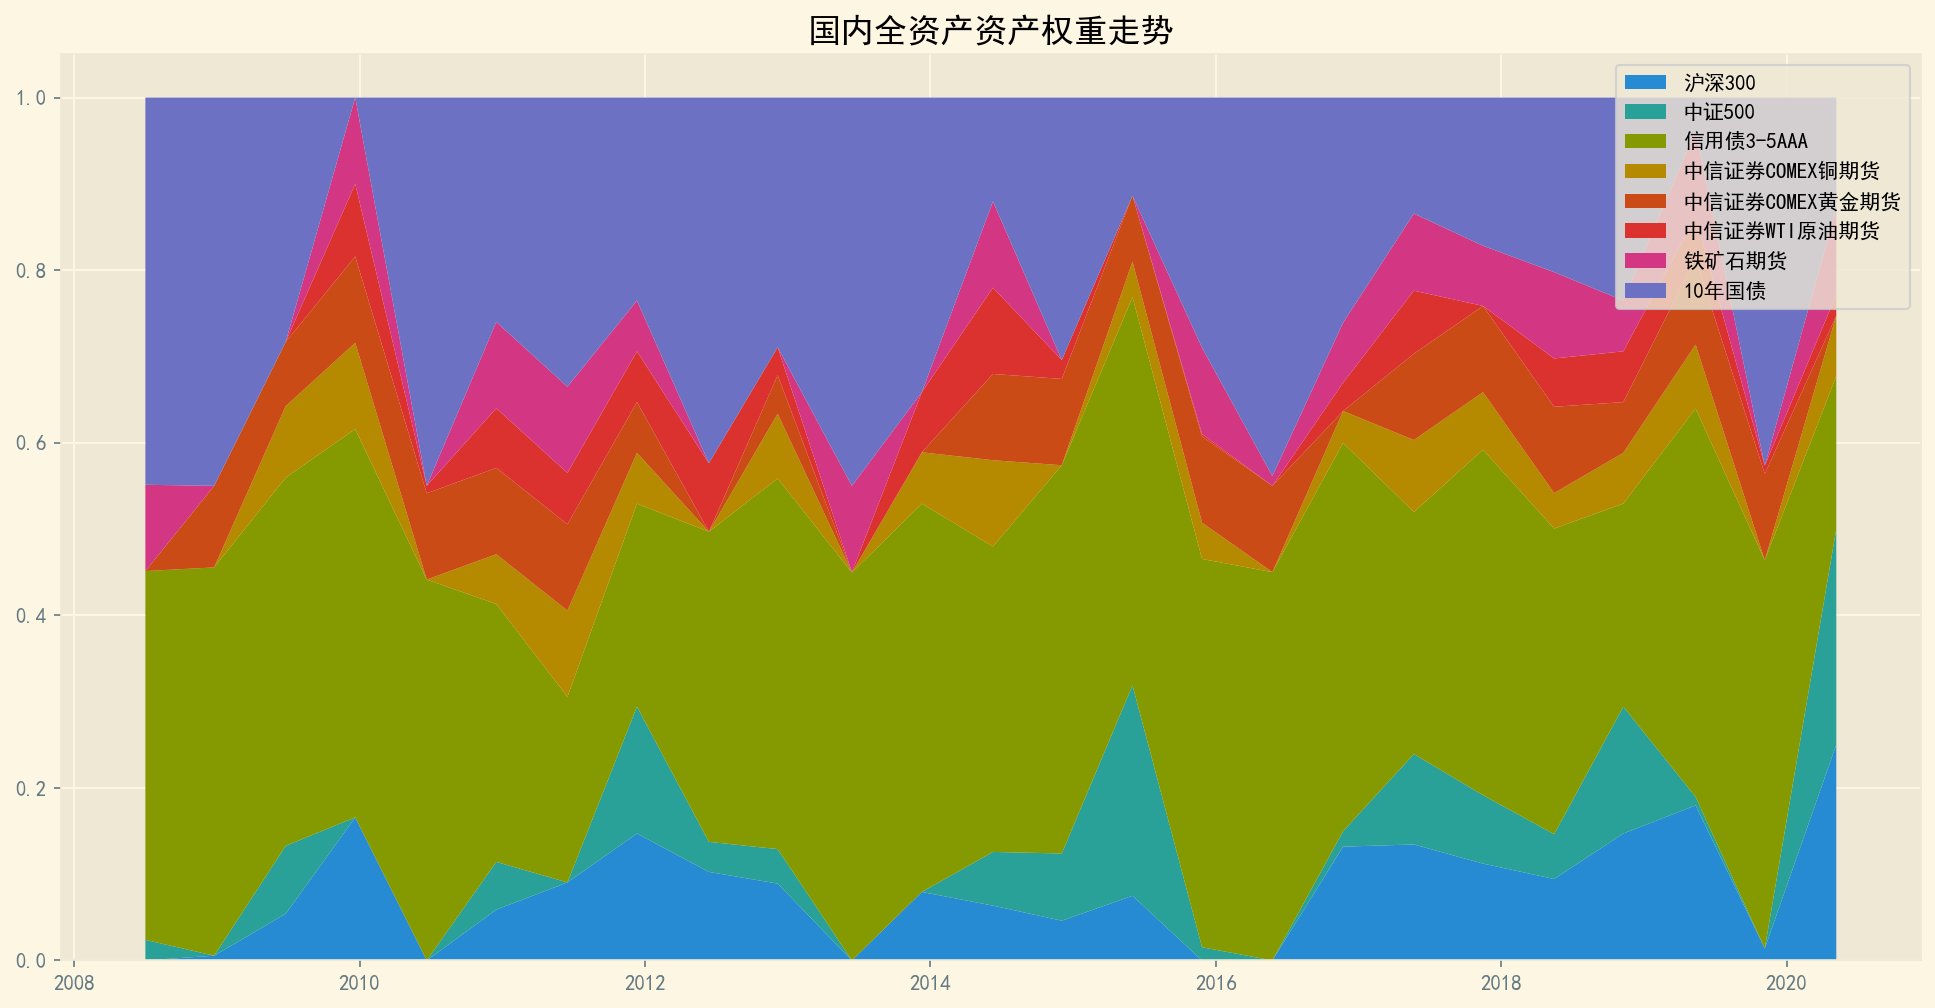

In [27]:
StatisticFunc.WeightPlot(tradeDF_A, weightDF_A, '国内全资产')

### 回测表现汇总

In [30]:
smryDF_A = StatisticFunc.summaryDF(tradeDF_A)
pfmcDF_A = StatisticFunc.performanceDF(smryDF_A, tradeDF_A, name='国内全资产（无指数平均）')

In [31]:
smryDF_A

,年收益率,年波动率,信息比,最大回撤
2008,0.328119,0.141612,2.317029,-0.043059
2009,0.040591,0.091118,0.445482,-0.062143
2010,0.029666,0.085468,0.347098,-0.119514
2011,0.034390,0.077713,0.442520,-0.128600
2012,-0.005209,0.061089,-0.085271,-0.093771
2013,-0.085408,0.061820,-1.381548,-0.171925
2014,0.159236,0.049161,3.239084,-0.169322
2015,0.106386,0.102789,1.034991,-0.121439
2016,0.115501,0.045960,2.513100,-0.083155
2017,-0.046907,0.041467,-1.131193,-0.126032


In [32]:
pfmcDF_A

,年化收益,年化波动率,最大回撤,最长不创新高时间,信息比,Calmar比率
国内全资产（无指数平均）,0.078451,0.072614,-0.171925,1152.0,1.080388,0.456309


### 收益率贡献度

In [33]:
annualContrb_A = StatisticFunc.AnnualContribution(tradeDF_A)

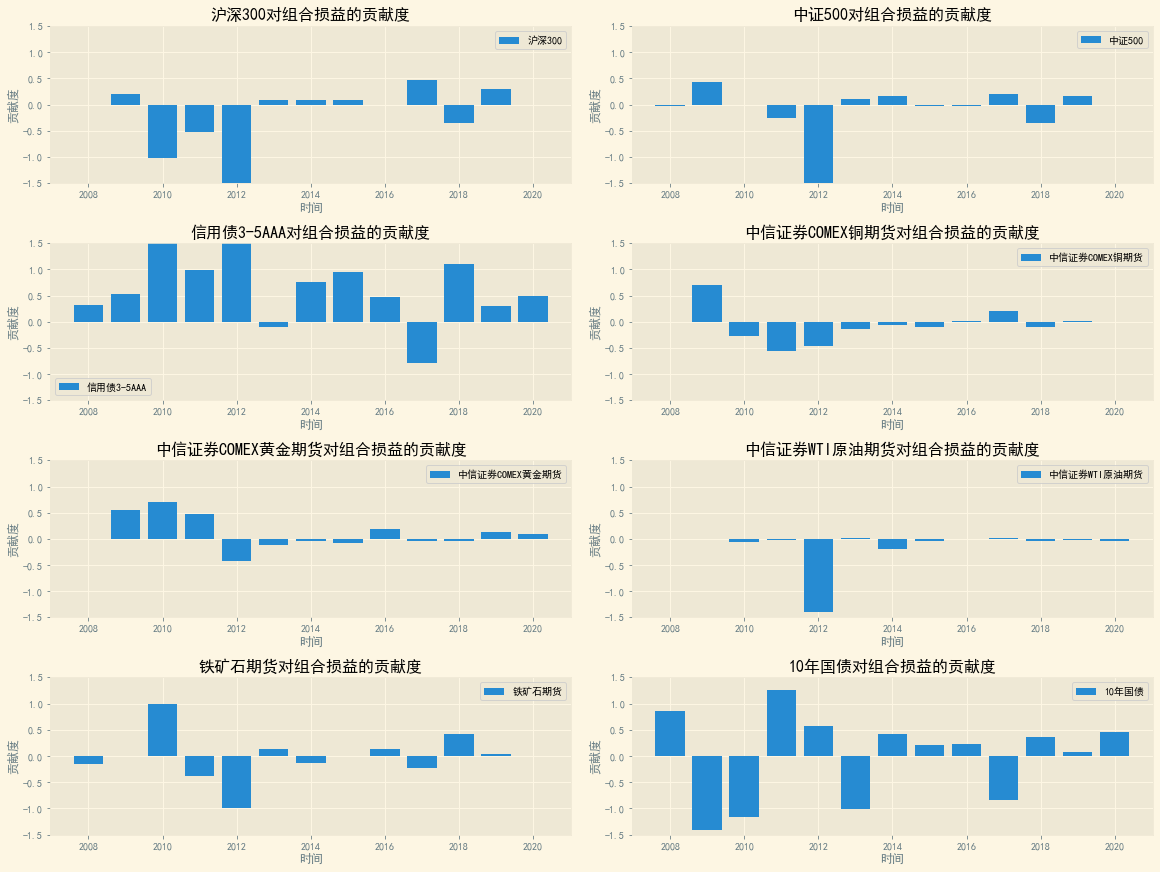

In [34]:
StatisticFunc.BarPlot(annualContrb_A, '国内全资产')

### 投资组合净值曲线

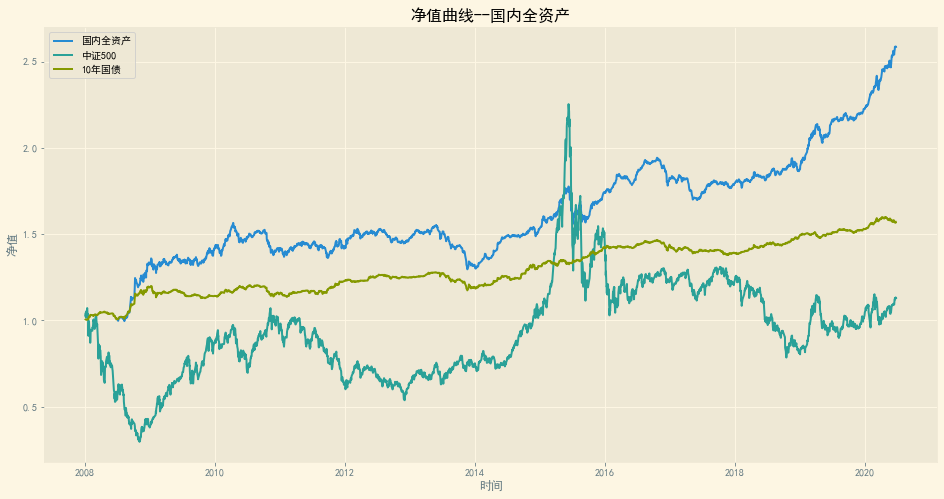

In [35]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF_A.index, tradeDF_A['投资组合净值']/10000, label='国内全资产')
    
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['10年国债'], label='10年国债')

plt.xlabel('时间')
plt.ylabel('净值')
plt.legend(loc='upper left')
plt.title('净值曲线--国内全资产')
plt.savefig('Pics/净值曲线_国内全资产.png')

## 模型B：国内全资产（指数平均）

In [36]:
leverReturns_B  = leverReturns.drop(['标普500', '10年美债'], axis=1)
leverCumReturns_B = leverCumReturns.drop(['标普500', '10年美债'], axis=1)

### 程序运行

In [37]:
tradeDF_B, weightDF_B = AlgoLoop.AlgoTrade(Assets, leverReturns_B, leverCumReturns_B, Turnovers, FXRates, mode='ema')

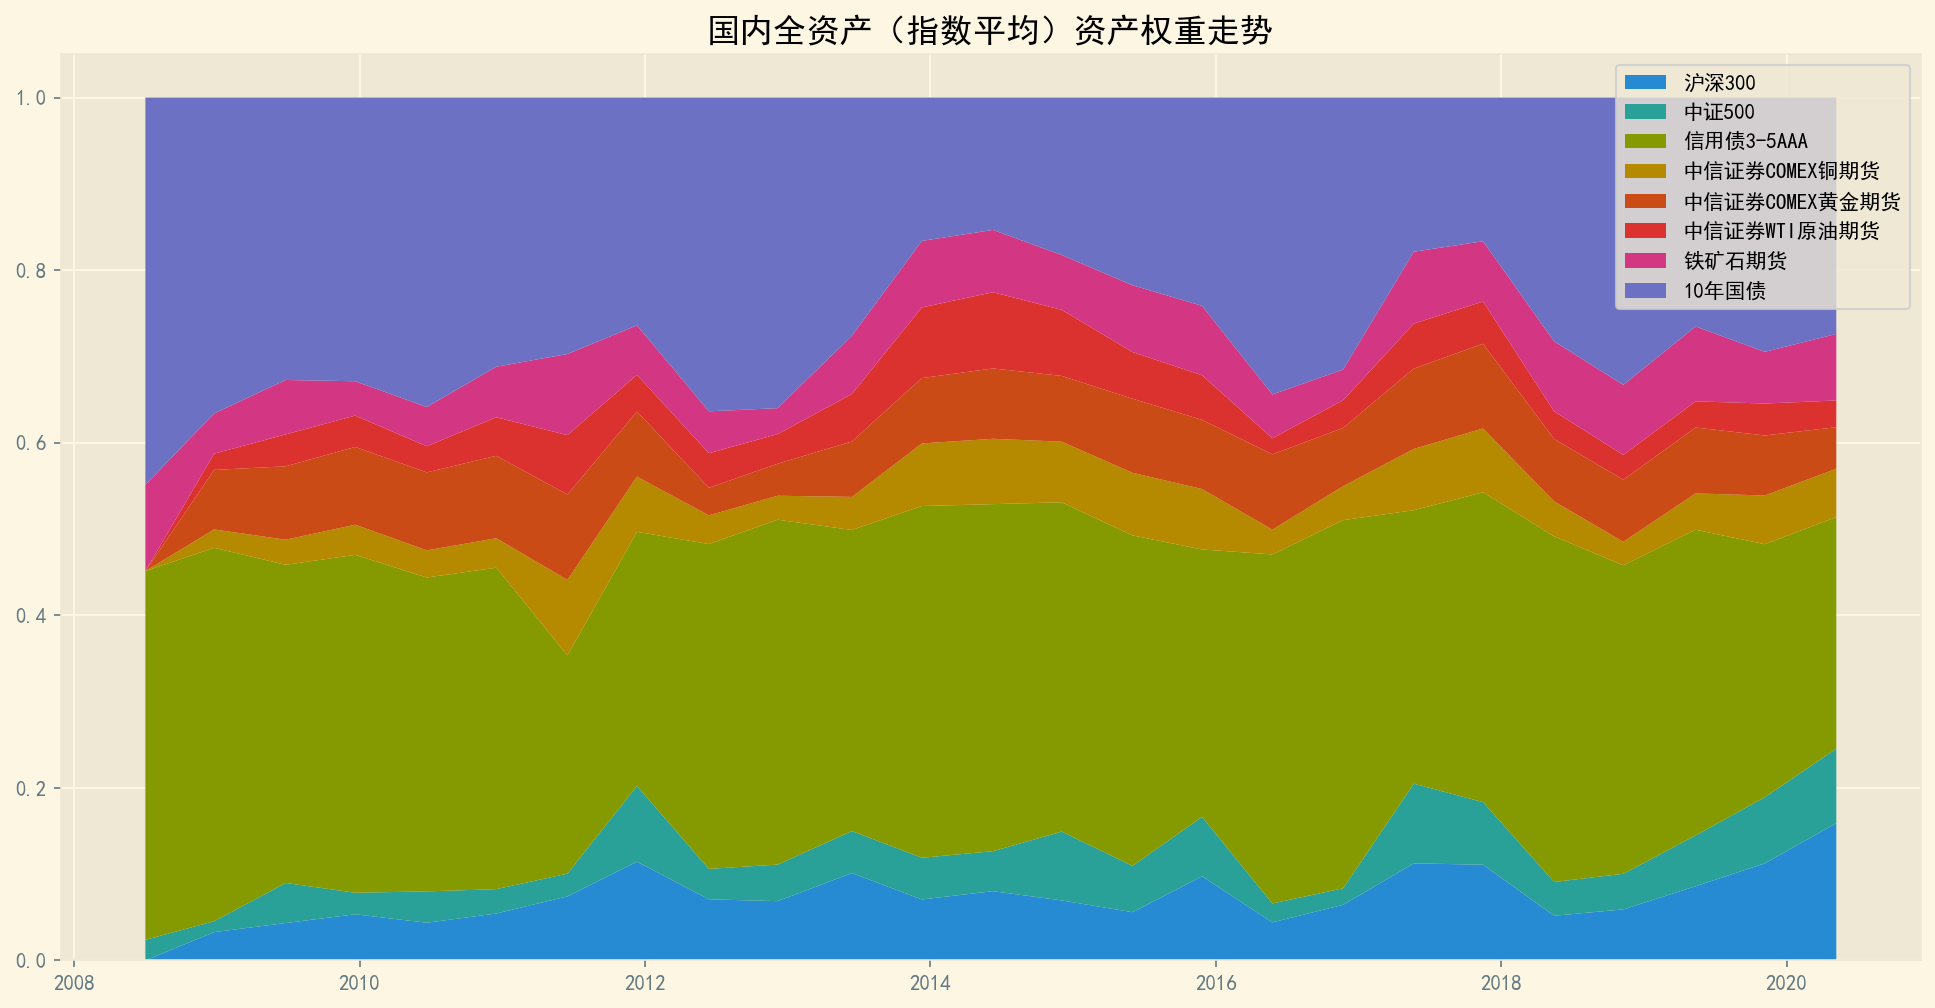

In [38]:
StatisticFunc.WeightPlot(tradeDF_B, weightDF_B, '国内全资产（指数平均）')

### 回测表现汇总

In [40]:
smryDF_B = StatisticFunc.summaryDF(tradeDF_B)
pfmcDF_B = StatisticFunc.performanceDF(smryDF_B, tradeDF_B, name='国内全资产（指数移动平均）')

In [41]:
smryDF_B

,年收益率,年波动率,信息比,最大回撤
2008,0.328119,0.141936,2.311737,-0.043059
2009,0.074571,0.080739,0.923605,-0.049575
2010,0.110238,0.063805,1.727730,-0.067196
2011,0.042657,0.076292,0.559125,-0.072877
2012,0.009436,0.049449,0.190828,-0.050488
2013,-0.035843,0.057207,-0.626549,-0.119475
2014,0.127180,0.044274,2.872585,-0.122865
2015,0.119028,0.068222,1.744718,-0.048310
2016,0.089020,0.056338,1.580120,-0.073270
2017,-0.053162,0.039128,-1.358679,-0.108463


In [42]:
pfmcDF_B

,年化收益,年化波动率,最大回撤,最长不创新高时间,信息比,Calmar比率
国内全资产（指数移动平均）,0.083456,0.063771,-0.122865,425.0,1.308679,0.67925


### 收益率贡献度

In [43]:
annualContrb_B = StatisticFunc.AnnualContribution(tradeDF_B)

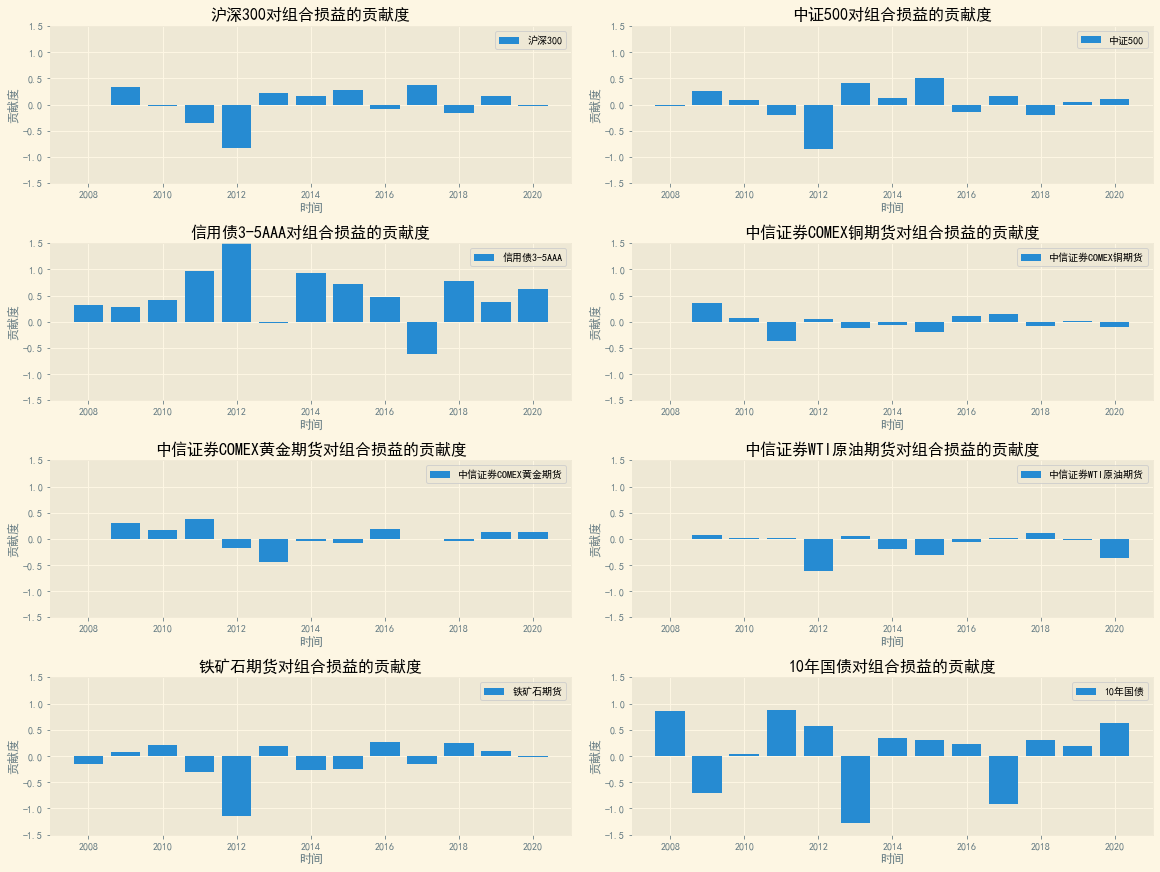

In [44]:
StatisticFunc.BarPlot(annualContrb_B, '国内全资产（指数平均）')

### 投资组合净值曲线

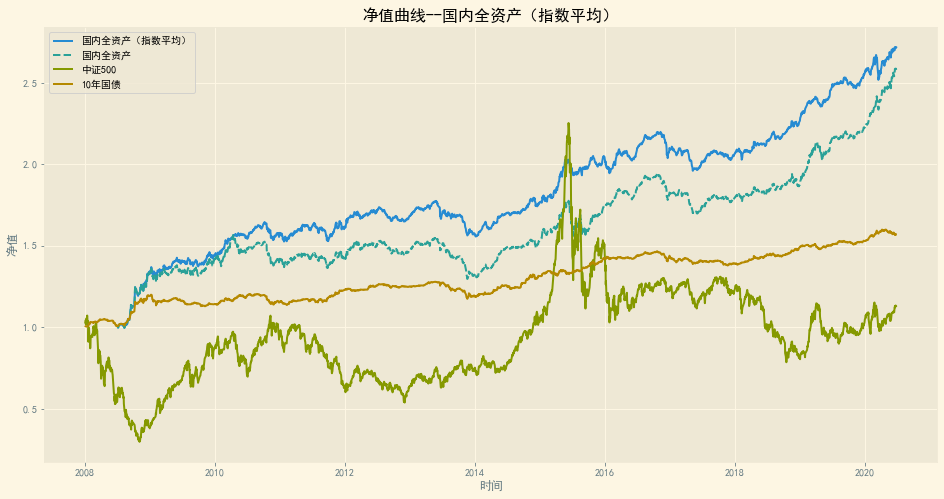

In [45]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF_B.index, tradeDF_B['投资组合净值']/10000, label='国内全资产（指数平均）')
    
plt.plot(tradeDF_A.index, tradeDF_A['投资组合净值']/10000, ls='--', label='国内全资产')
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['10年国债'], label='10年国债')

plt.xlabel('时间')
plt.ylabel('净值')
plt.legend(loc='upper left')
plt.title('净值曲线--国内全资产（指数平均）')
plt.savefig('Pics/净值曲线_国内全资产（指数平均）.png')

# 各类资产的特性与选择

- 有商品期货
- 无商品期货

## 各资产的年度表现

### 年化收益

In [47]:
# annualR = StatisticFunc.AnnualReturns(cumReturns)
# annualR

### 年化波动率

In [48]:
# annualV = StatisticFunc.AnnualVolatility(cumReturns)
# annualV

### 汇总

In [45]:
annualDF = pd.DataFrame(index=['年化收益', '年化波动率', '信息比'], columns=annualR.columns)
annualDF.loc['年化收益', :] = annualR.mean(axis=0)
annualDF.loc['年化波动率', :] = annualV.mean(axis=0)
annualDF.loc['信息比', :] = annualDF.loc['年化收益', :] / annualDF.loc['年化波动率', :]

In [46]:
annualDF

,沪深300,中证500,信用债3-5AAA,中信证券COMEX铜期货,中信证券COMEX黄金期货,中信证券WTI原油期货,标普500,铁矿石期货,10年国债,10年美债
年化收益,0.0549491,0.0987289,0.0560435,0.0399181,0.0514252,-0.138311,0.0759427,0.00494349,0.0371039,0.0438332
年化波动率,0.249967,0.288519,0.0203163,0.25549,0.177799,0.43602,0.198355,0.159942,0.032491,0.0610618
信息比,0.219825,0.342192,2.75855,0.156241,0.289233,-0.317212,0.382863,0.0309081,1.14198,0.717849


## 模型C：剔除部分商品期货

In [49]:
# 仅保留黄金期货
leverReturns_C1    = leverReturns_B.drop(['中信证券COMEX铜期货', '铁矿石期货', '中信证券WTI原油期货'], axis=1)
leverCumReturns_C1 = leverCumReturns_B.drop(['中信证券COMEX铜期货', '铁矿石期货', '中信证券WTI原油期货'], axis=1)

# 仅保留铁矿石期货
leverReturns_C2    = leverReturns_B.drop(['中信证券COMEX铜期货', '中信证券COMEX黄金期货', '中信证券WTI原油期货'], axis=1)
leverCumReturns_C2 = leverCumReturns_B.drop(['中信证券COMEX铜期货', '中信证券COMEX黄金期货', '中信证券WTI原油期货'], axis=1)

# 保留黄金和铁矿石
leverReturns_C3    = leverReturns_B.drop(['中信证券COMEX黄金期货', '铁矿石期货', '中信证券WTI原油期货'], axis=1)
leverCumReturns_C3 = leverCumReturns_B.drop(['中信证券COMEX黄金期货', '铁矿石期货', '中信证券WTI原油期货'], axis=1)

# 剔除所有商品期货
leverReturns_C4    = leverReturns_B.drop(['中信证券COMEX铜期货', '中信证券COMEX黄金期货', '铁矿石期货', '中信证券WTI原油期货'], axis=1)
leverCumReturns_C4 = leverCumReturns_B.drop(['中信证券COMEX铜期货', '中信证券COMEX黄金期货', '铁矿石期货', '中信证券WTI原油期货'], axis=1)

### 程序运行

In [50]:
tradeDF_C1, weightDF_C1 = AlgoLoop.AlgoTrade(Assets, leverReturns_C1, leverCumReturns_C1, 
                                             Turnovers, FXRates, mode='ema')
tradeDF_C2, weightDF_C2 = AlgoLoop.AlgoTrade(Assets, leverReturns_C2, leverCumReturns_C2, 
                                             Turnovers, FXRates, mode='ema')
tradeDF_C3, weightDF_C3 = AlgoLoop.AlgoTrade(Assets, leverReturns_C3, leverCumReturns_C3, 
                                             Turnovers, FXRates, mode='ema')
tradeDF_C4, weightDF_C4 = AlgoLoop.AlgoTrade(Assets, leverReturns_C4, leverCumReturns_C4, 
                                             Turnovers, FXRates, mode='ema')

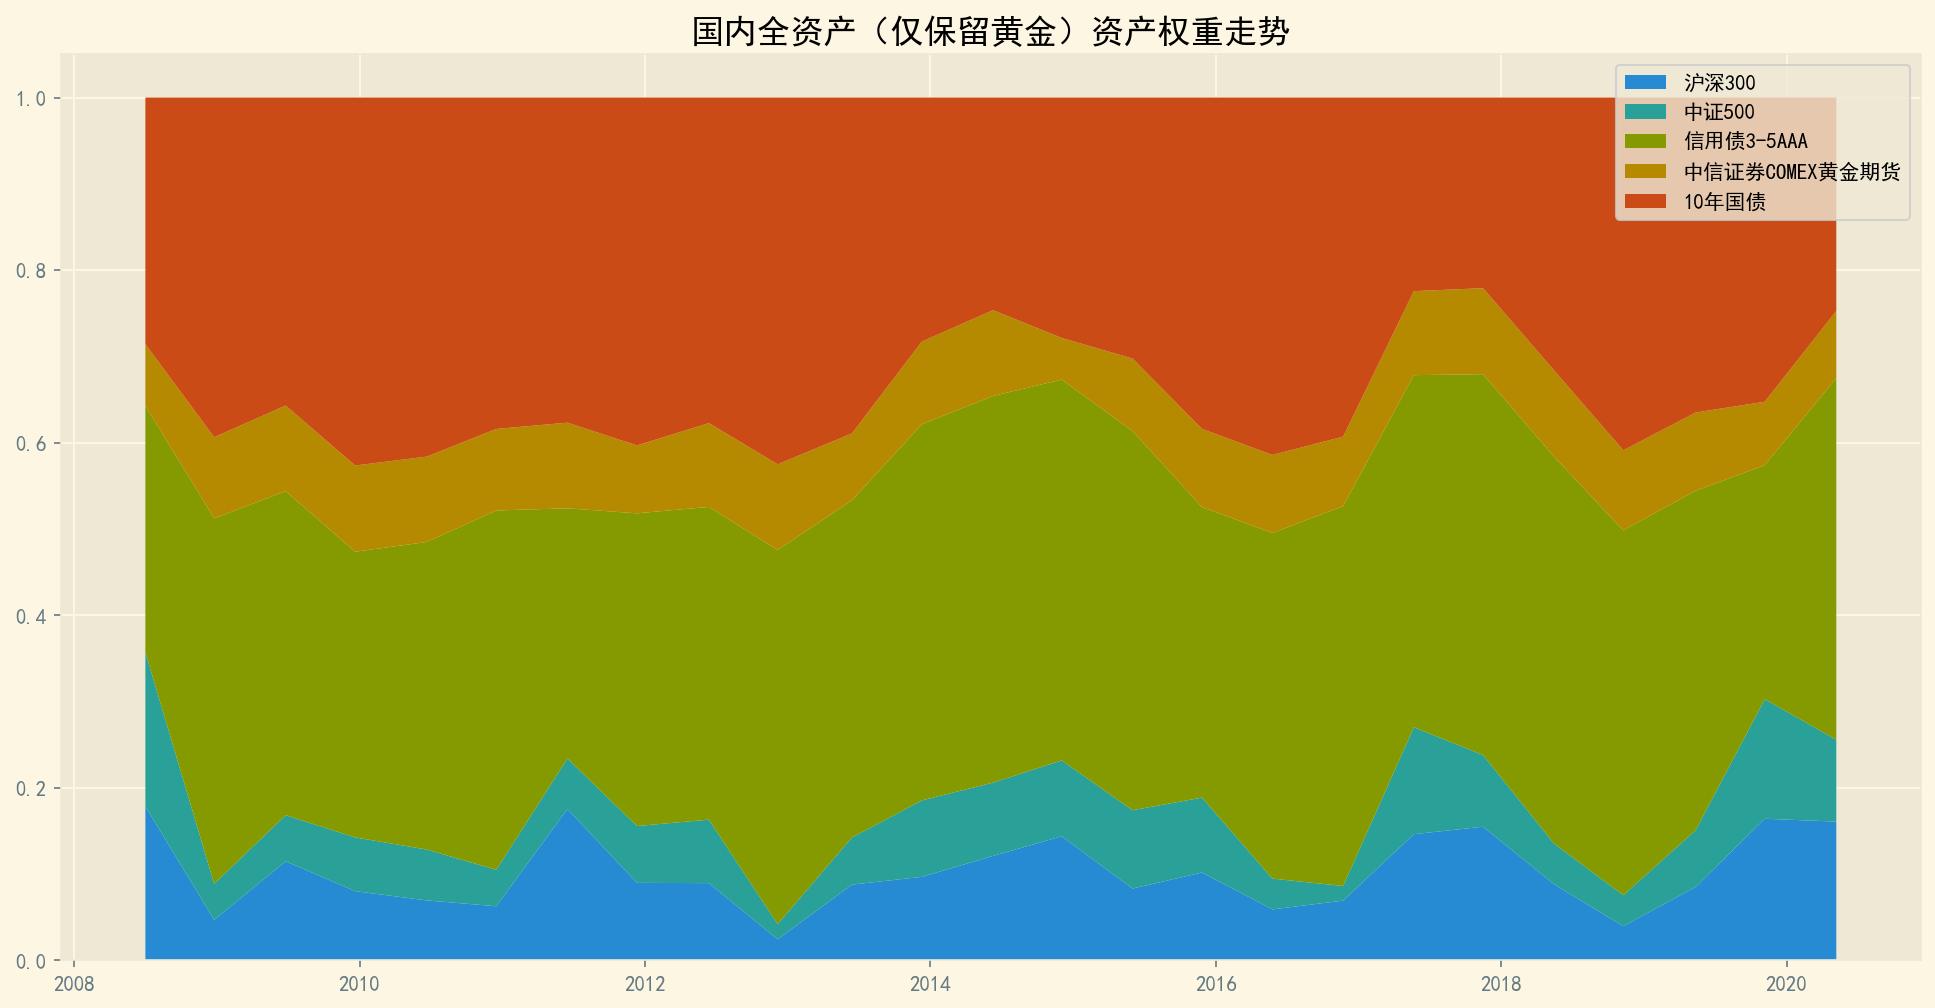

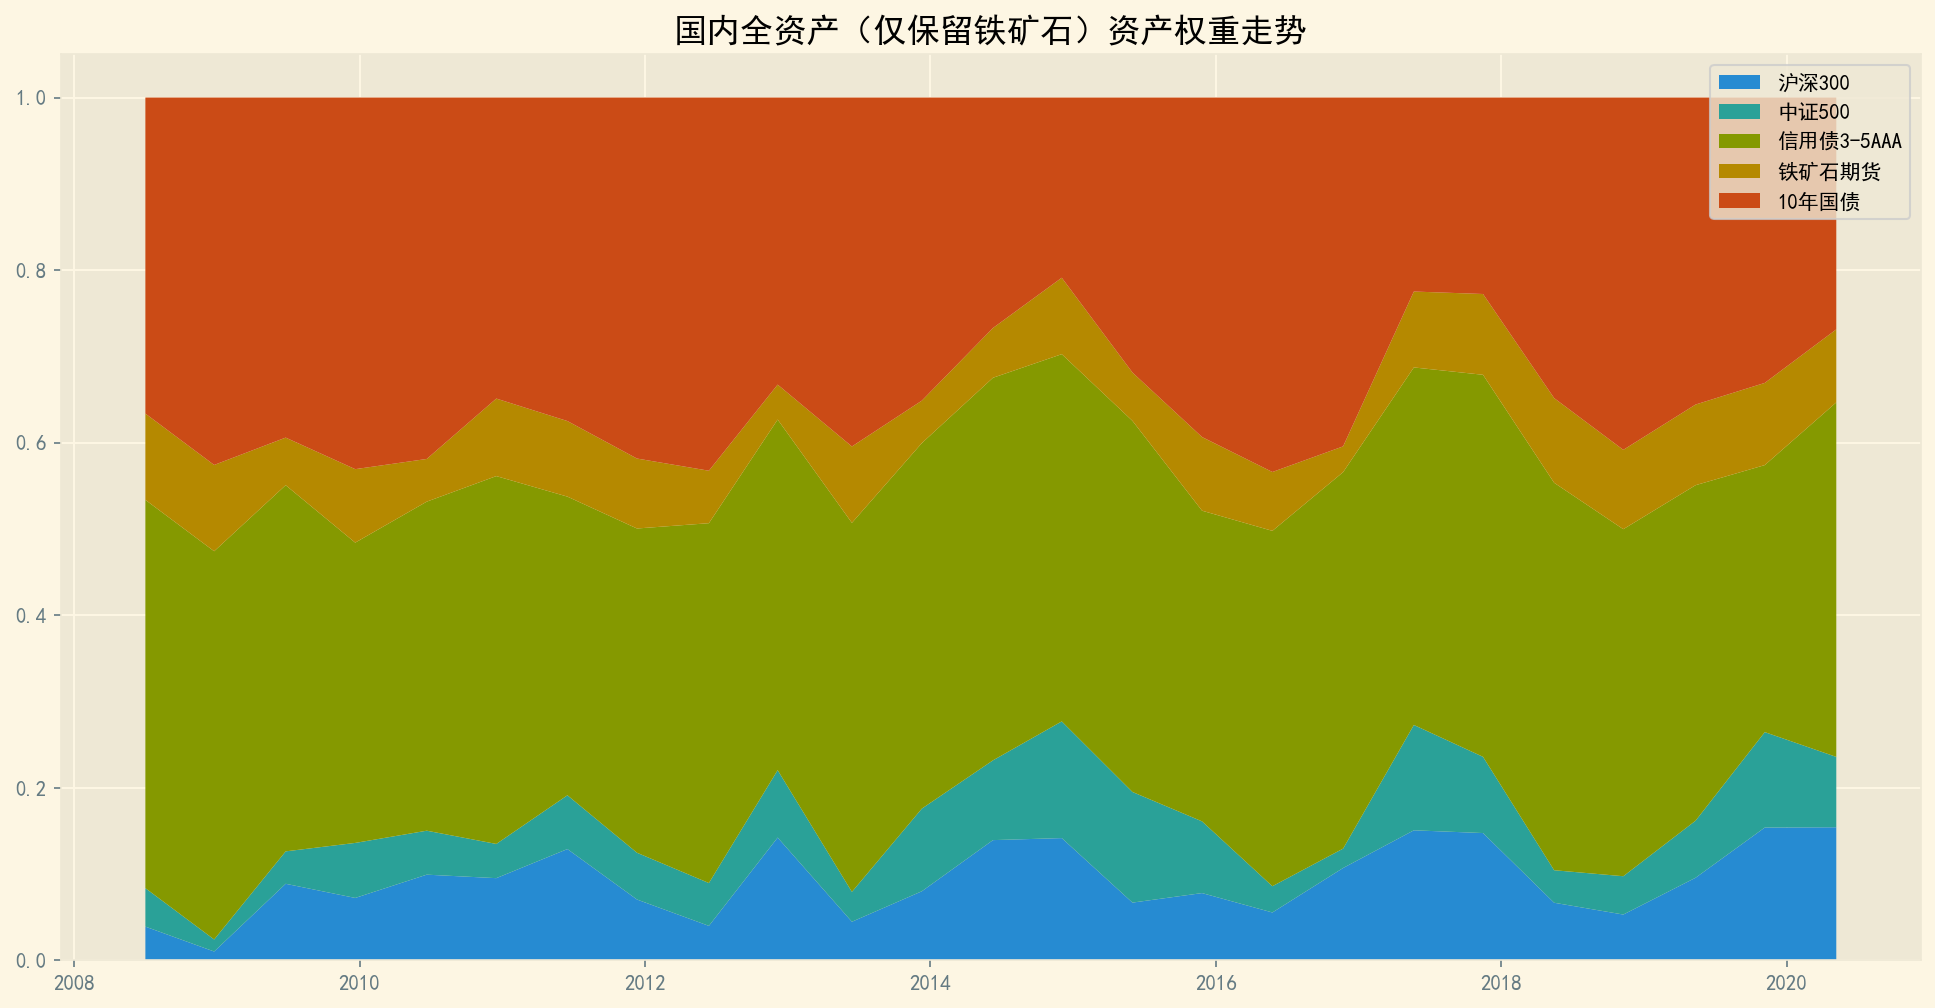

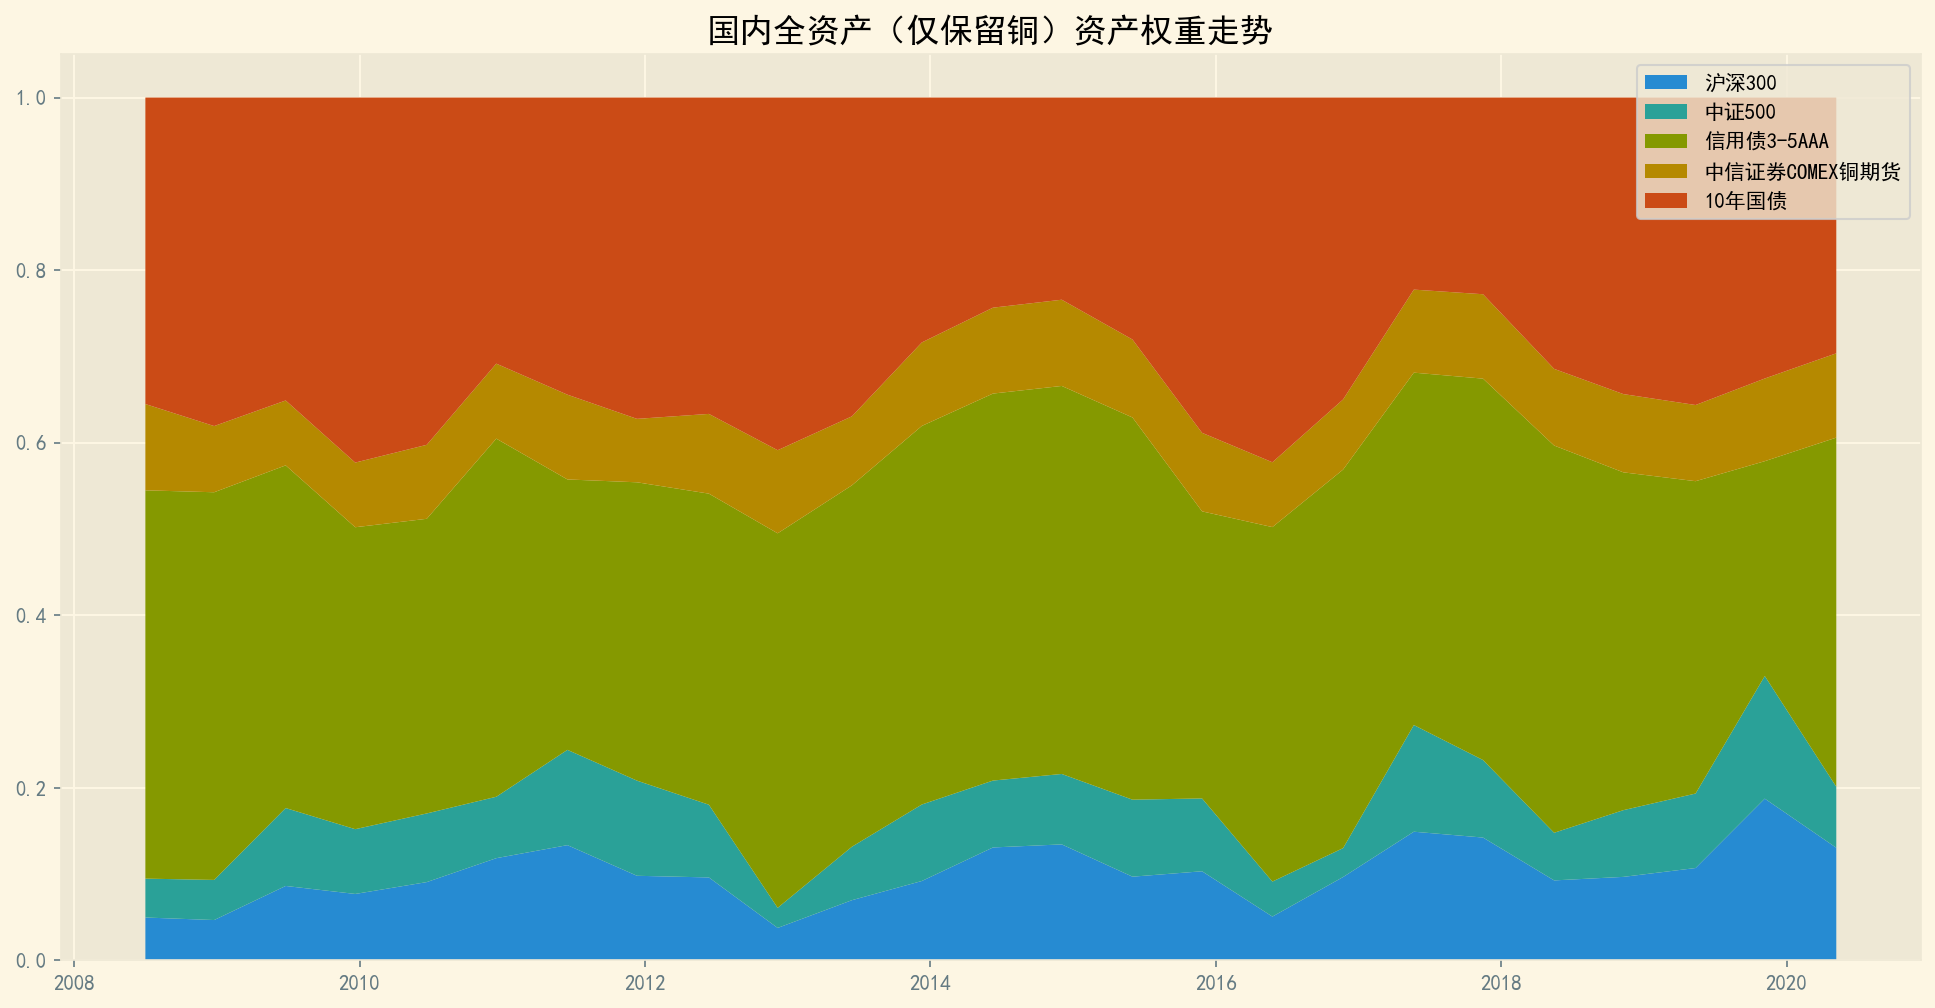

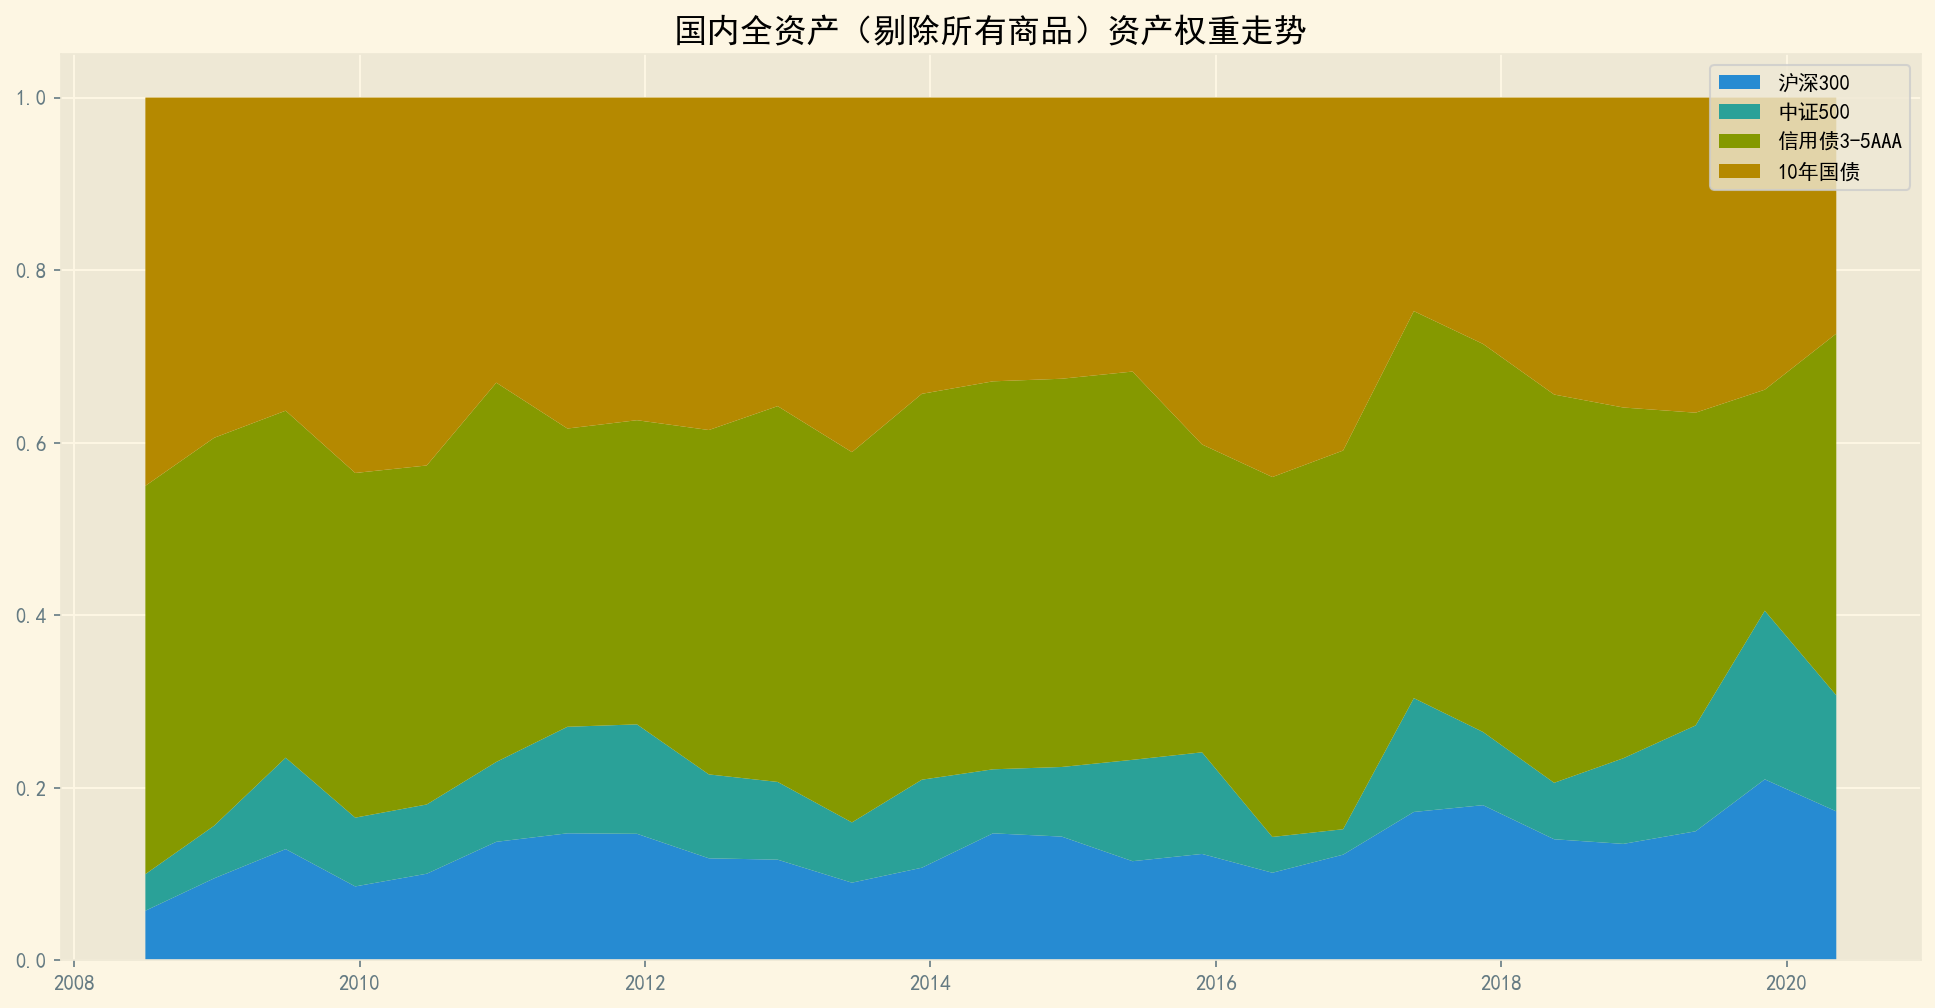

In [51]:
StatisticFunc.WeightPlot(tradeDF_C1, weightDF_C1, '国内全资产（仅保留黄金）')
StatisticFunc.WeightPlot(tradeDF_C2, weightDF_C2, '国内全资产（仅保留铁矿石）')
StatisticFunc.WeightPlot(tradeDF_C3, weightDF_C3, '国内全资产（仅保留铜）')
StatisticFunc.WeightPlot(tradeDF_C4, weightDF_C4, '国内全资产（剔除所有商品）')

### 回测表现汇总

In [52]:
smryDF_C1 = StatisticFunc.summaryDF(tradeDF_C1)
pfmcDF_C1 = StatisticFunc.performanceDF(smryDF_C1, tradeDF_C1, name='国内全资产（仅保留黄金）')

smryDF_C2 = StatisticFunc.summaryDF(tradeDF_C2)
pfmcDF_C2 = StatisticFunc.performanceDF(smryDF_C2, tradeDF_C2, name='国内全资产（仅保留铁矿石）')

smryDF_C3 = StatisticFunc.summaryDF(tradeDF_C3)
pfmcDF_C3 = StatisticFunc.performanceDF(smryDF_C3, tradeDF_C3, name='国内全资产（仅保留铜）')

smryDF_C4 = StatisticFunc.summaryDF(tradeDF_C4)
pfmcDF_C4 = StatisticFunc.performanceDF(smryDF_C4, tradeDF_C4, name='国内全资产（剔除所有商品）')

In [53]:
# 仅保留黄金
smryDF_C1

,年收益率,年波动率,信息比,最大回撤
2008,0.134425,0.166786,0.805971,-0.102252
2009,0.074447,0.088260,0.843497,-0.055240
2010,0.081314,0.066005,1.231948,-0.074328
2011,0.064464,0.076467,0.843023,-0.092203
2012,0.032767,0.045690,0.717165,-0.051353
2013,-0.086003,0.063540,-1.353527,-0.150207
2014,0.264745,0.057486,4.605415,-0.154190
2015,0.279066,0.079875,3.493773,-0.056014
2016,0.072033,0.057667,1.249118,-0.100811
2017,-0.054693,0.040574,-1.347979,-0.126786


In [54]:
# 仅保留铁矿石
smryDF_C2

,年收益率,年波动率,信息比,最大回撤
2008,0.264046,0.131705,2.004833,-0.048262
2009,-0.009728,0.079794,-0.121917,-0.063316
2010,0.103945,0.067750,1.534250,-0.074894
2011,0.044157,0.075764,0.582826,-0.083500
2012,0.030407,0.042483,0.715740,-0.066008
2013,-0.043201,0.064894,-0.665717,-0.156808
2014,0.267199,0.062323,4.287315,-0.158682
2015,0.295843,0.088419,3.345907,-0.061825
2016,0.088796,0.056988,1.558146,-0.086763
2017,-0.064097,0.042130,-1.521416,-0.122992


In [55]:
# 仅保留铜
smryDF_C3

,年收益率,年波动率,信息比,最大回撤
2008,0.233796,0.129886,1.800017,-0.045194
2009,0.146862,0.099768,1.472039,-0.048633
2010,0.097769,0.075275,1.298820,-0.069872
2011,0.013664,0.084921,0.160900,-0.096293
2012,0.030481,0.052524,0.580323,-0.057299
2013,-0.067234,0.062535,-1.075142,-0.144149
2014,0.259579,0.057720,4.497228,-0.142393
2015,0.236138,0.082123,2.875403,-0.060718
2016,0.074898,0.059713,1.254313,-0.081921
2017,-0.039341,0.042500,-0.925665,-0.113339


In [56]:
# 剔除所有商品
smryDF_C4

,年收益率,年波动率,信息比,最大回撤
2008,0.360453,0.141751,2.542855,-0.036316
2009,0.106383,0.101874,1.044255,-0.063377
2010,0.078904,0.071214,1.107983,-0.082548
2011,0.033311,0.086702,0.384200,-0.099340
2012,0.018864,0.057260,0.329445,-0.067784
2013,-0.045934,0.071309,-0.644155,-0.161793
2014,0.298055,0.064043,4.653983,-0.164244
2015,0.265424,0.088749,2.990731,-0.070958
2016,0.052035,0.066002,0.788375,-0.099062
2017,-0.053339,0.043165,-1.235685,-0.130803


In [57]:
tmp = pd.concat([pfmcDF_C1, pfmcDF_C2, pfmcDF_C3, pfmcDF_C4])
tmp

,年化收益,年化波动率,最大回撤,最长不创新高时间,信息比,Calmar比率
国内全资产（仅保留黄金）,0.089249,0.068928,-0.154190,517.0,1.294823,0.578827
国内全资产（仅保留铁矿石）,0.099999,0.065531,-0.158682,488.0,1.525991,0.630186
国内全资产（仅保留铜）,0.095536,0.071458,-0.144149,488.0,1.336951,0.662760
国内全资产（剔除所有商品）,0.108244,0.075720,-0.164244,517.0,1.429538,0.659045


### 收益率贡献度

In [58]:
annualContrb_C1 = StatisticFunc.AnnualContribution(tradeDF_C1)

annualContrb_C2 = StatisticFunc.AnnualContribution(tradeDF_C2)

annualContrb_C3 = StatisticFunc.AnnualContribution(tradeDF_C3)

annualContrb_C4 = StatisticFunc.AnnualContribution(tradeDF_C4)

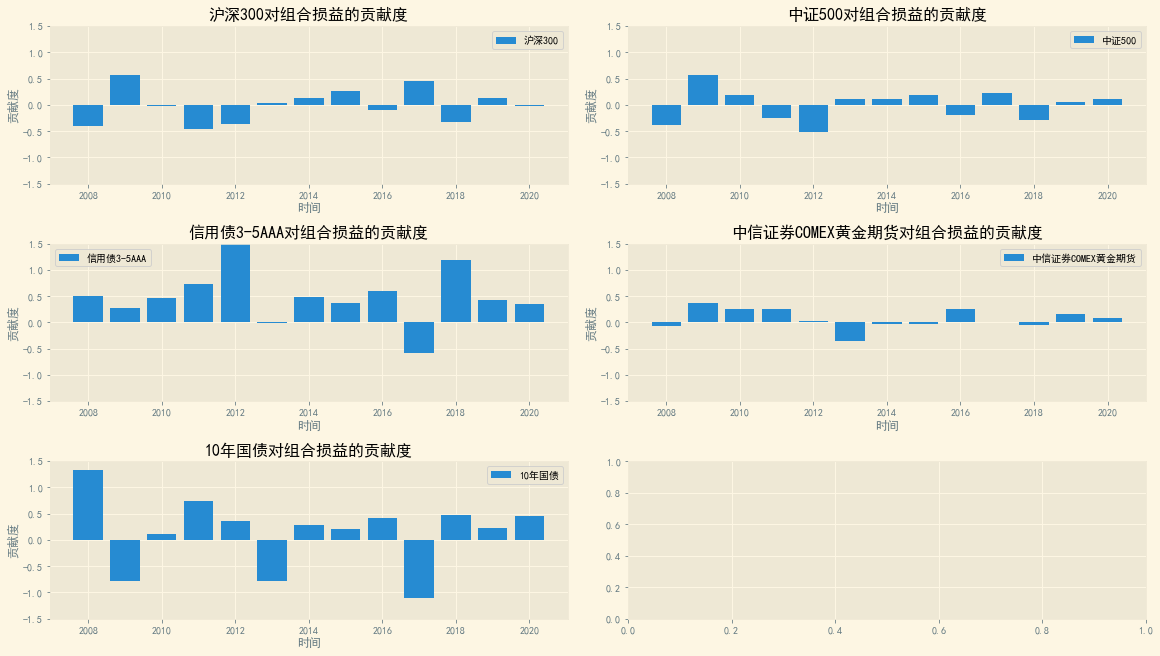

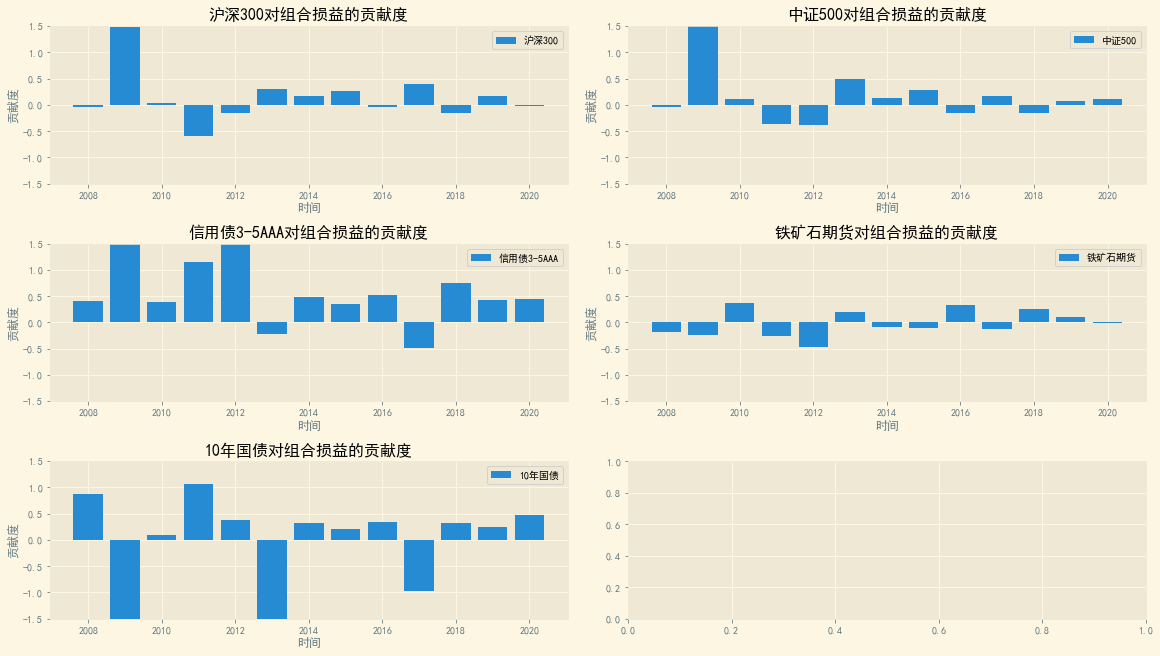

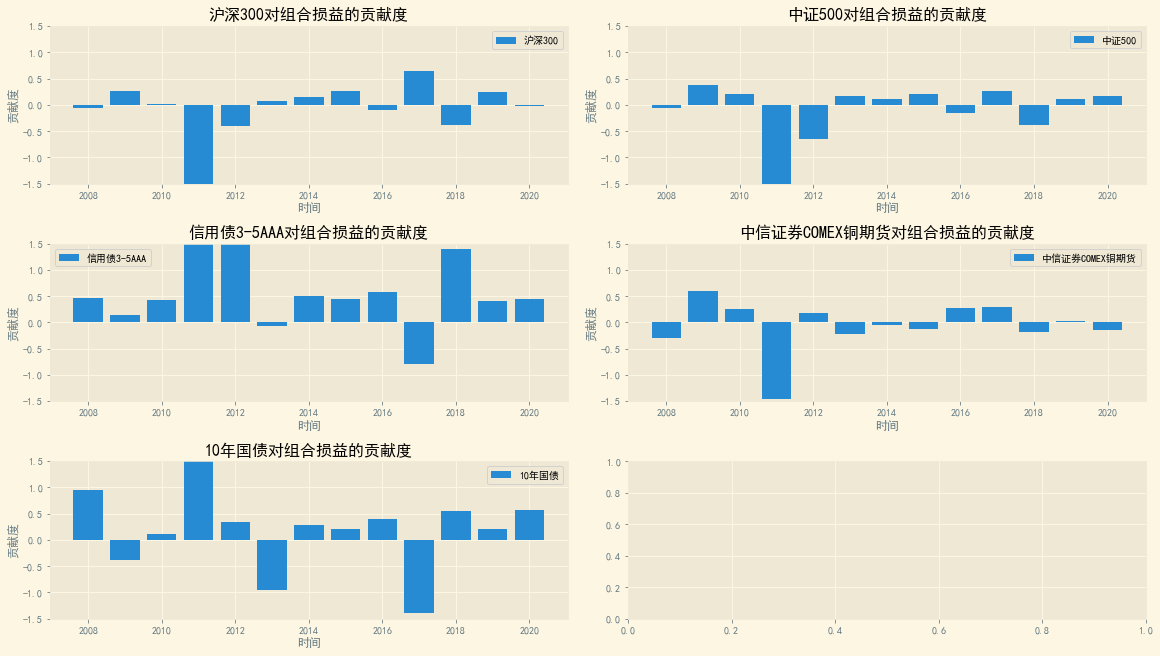

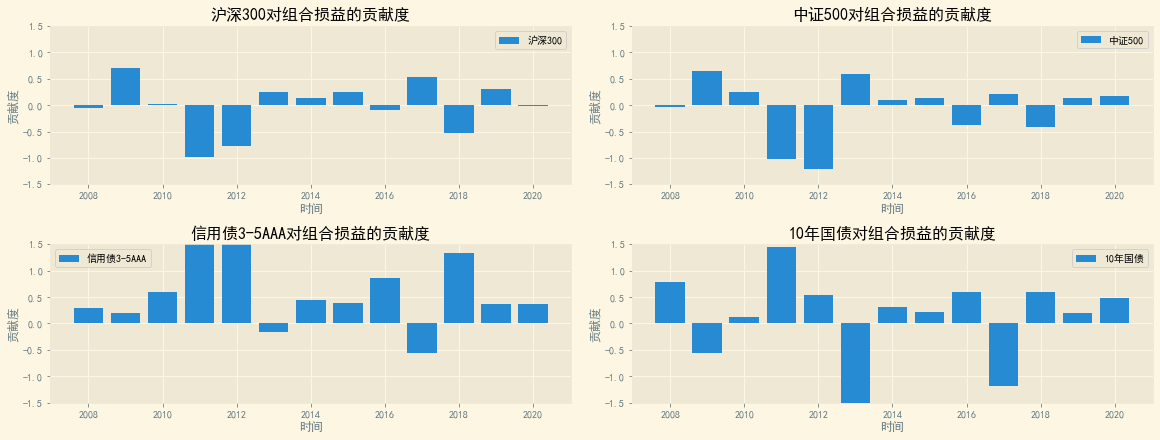

In [59]:
StatisticFunc.BarPlot(annualContrb_C1, '国内全资产（仅保留黄金）')
StatisticFunc.BarPlot(annualContrb_C2, '国内全资产（仅保留铁矿石）')
StatisticFunc.BarPlot(annualContrb_C3, '国内全资产（仅保留铜）')
StatisticFunc.BarPlot(annualContrb_C4, '国内全资产（剔除所有商品期货）')

- 铁矿石的纳入影响了模型对沪深300指数的权重分配，从而使得投资组合表现变好

### 投资组合净值曲线

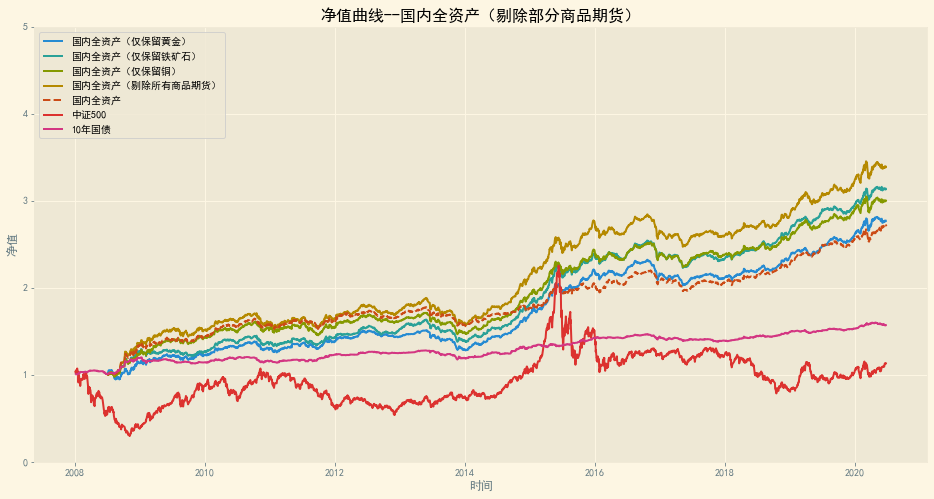

In [60]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF_C1.index, tradeDF_C1['投资组合净值']/10000, label='国内全资产（仅保留黄金）')
plt.plot(tradeDF_C2.index, tradeDF_C2['投资组合净值']/10000, label='国内全资产（仅保留铁矿石）')
plt.plot(tradeDF_C3.index, tradeDF_C3['投资组合净值']/10000, label='国内全资产（仅保留铜）')
plt.plot(tradeDF_C4.index, tradeDF_C4['投资组合净值']/10000, label='国内全资产（剔除所有商品期货）')
    
plt.plot(tradeDF_B.index, tradeDF_B['投资组合净值']/10000, ls='--', label='国内全资产')  
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['10年国债'], label='10年国债')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('净值曲线--国内全资产（剔除部分商品期货）')
plt.savefig('Pics/净值曲线_国内全资产（剔除部分商品期货）.png')

# 资产分散的效果

- 方法一：引入更多资产（美股，美债）

## 各资产间相关性

In [61]:
corrDF = cumReturns.corr()
corrDF

,沪深300,中证500,信用债3-5AAA,中信证券COMEX铜期货,中信证券COMEX黄金期货,中信证券WTI原油期货,标普500,铁矿石期货,10年国债,10年美债
沪深300,1.000000,0.758996,0.455760,-0.082924,-0.069710,-0.225709,0.541116,-0.268238,0.421037,0.329452
中证500,0.758996,1.000000,0.573525,-0.315036,-0.051980,-0.524662,0.564017,-0.536481,0.556464,0.526424
信用债3-5AAA,0.455760,0.573525,1.000000,-0.617814,0.191166,-0.768984,0.949736,-0.687471,0.984725,0.948543
中信证券COMEX铜期货,-0.082924,-0.315036,-0.617814,1.000000,0.310878,0.661697,-0.474607,0.876541,-0.667222,-0.593492
中信证券COMEX黄金期货,-0.069710,-0.051980,0.191166,0.310878,1.000000,-0.254673,0.113409,0.295797,0.215692,0.375001
中信证券WTI原油期货,-0.225709,-0.524662,-0.768984,0.661697,-0.254673,1.000000,-0.600452,0.745517,-0.816450,-0.795606
标普500,0.541116,0.564017,0.949736,-0.474607,0.113409,-0.600452,1.000000,-0.580541,0.892710,0.866378
铁矿石期货,-0.268238,-0.536481,-0.687471,0.876541,0.295797,0.745517,-0.580541,1.000000,-0.716660,-0.634934
10年国债,0.421037,0.556464,0.984725,-0.667222,0.215692,-0.816450,0.892710,-0.716660,1.000000,0.947366
10年美债,0.329452,0.526424,0.948543,-0.593492,0.375001,-0.795606,0.866378,-0.634934,0.947366,1.000000


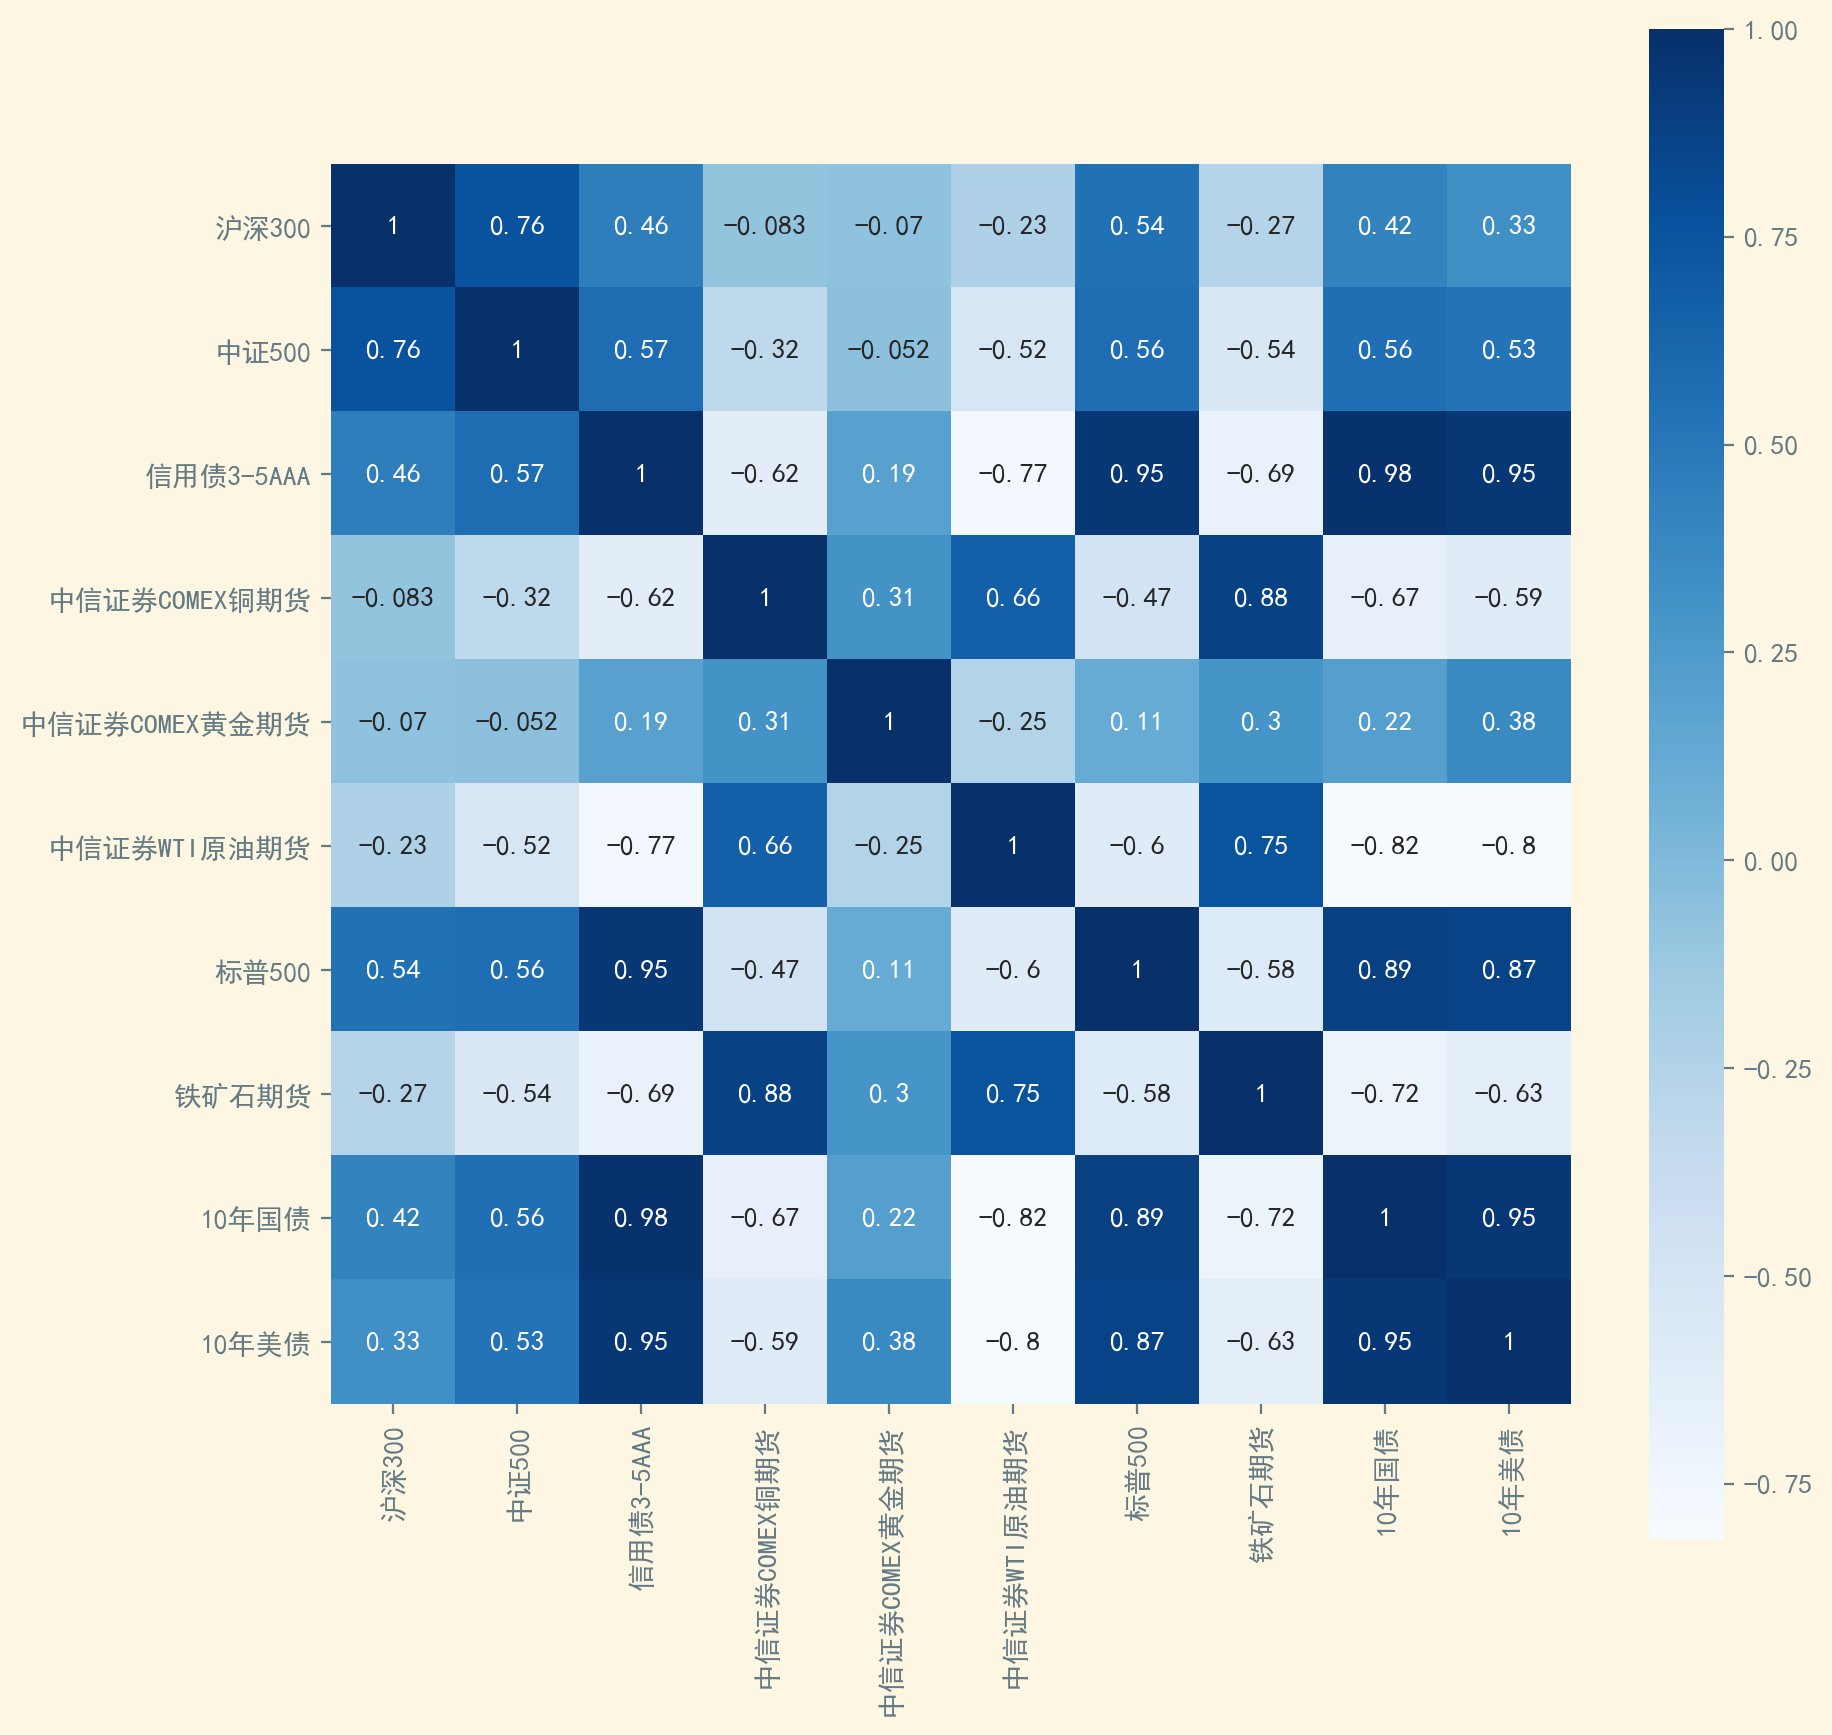

In [62]:
fig = plt.figure(figsize=(10, 10), dpi=200)
sns.heatmap(corrDF, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

## 模型D：引入美元资产

- 标普500
- 10年期美债

In [63]:
leverReturns_D    = leverReturns.drop(['中信证券COMEX铜期货', '中信证券COMEX黄金期货', '铁矿石期货', '中信证券WTI原油期货'], axis=1)
leverCumReturns_D = leverCumReturns.drop(['中信证券COMEX铜期货', '中信证券COMEX黄金期货', '铁矿石期货', '中信证券WTI原油期货'], axis=1)

### 程序运行

In [64]:
tradeDF_D, weightDF_D = AlgoLoop.AlgoTrade(Assets, leverReturns_D, leverCumReturns_D, Turnovers, FXRates, mode='ema')

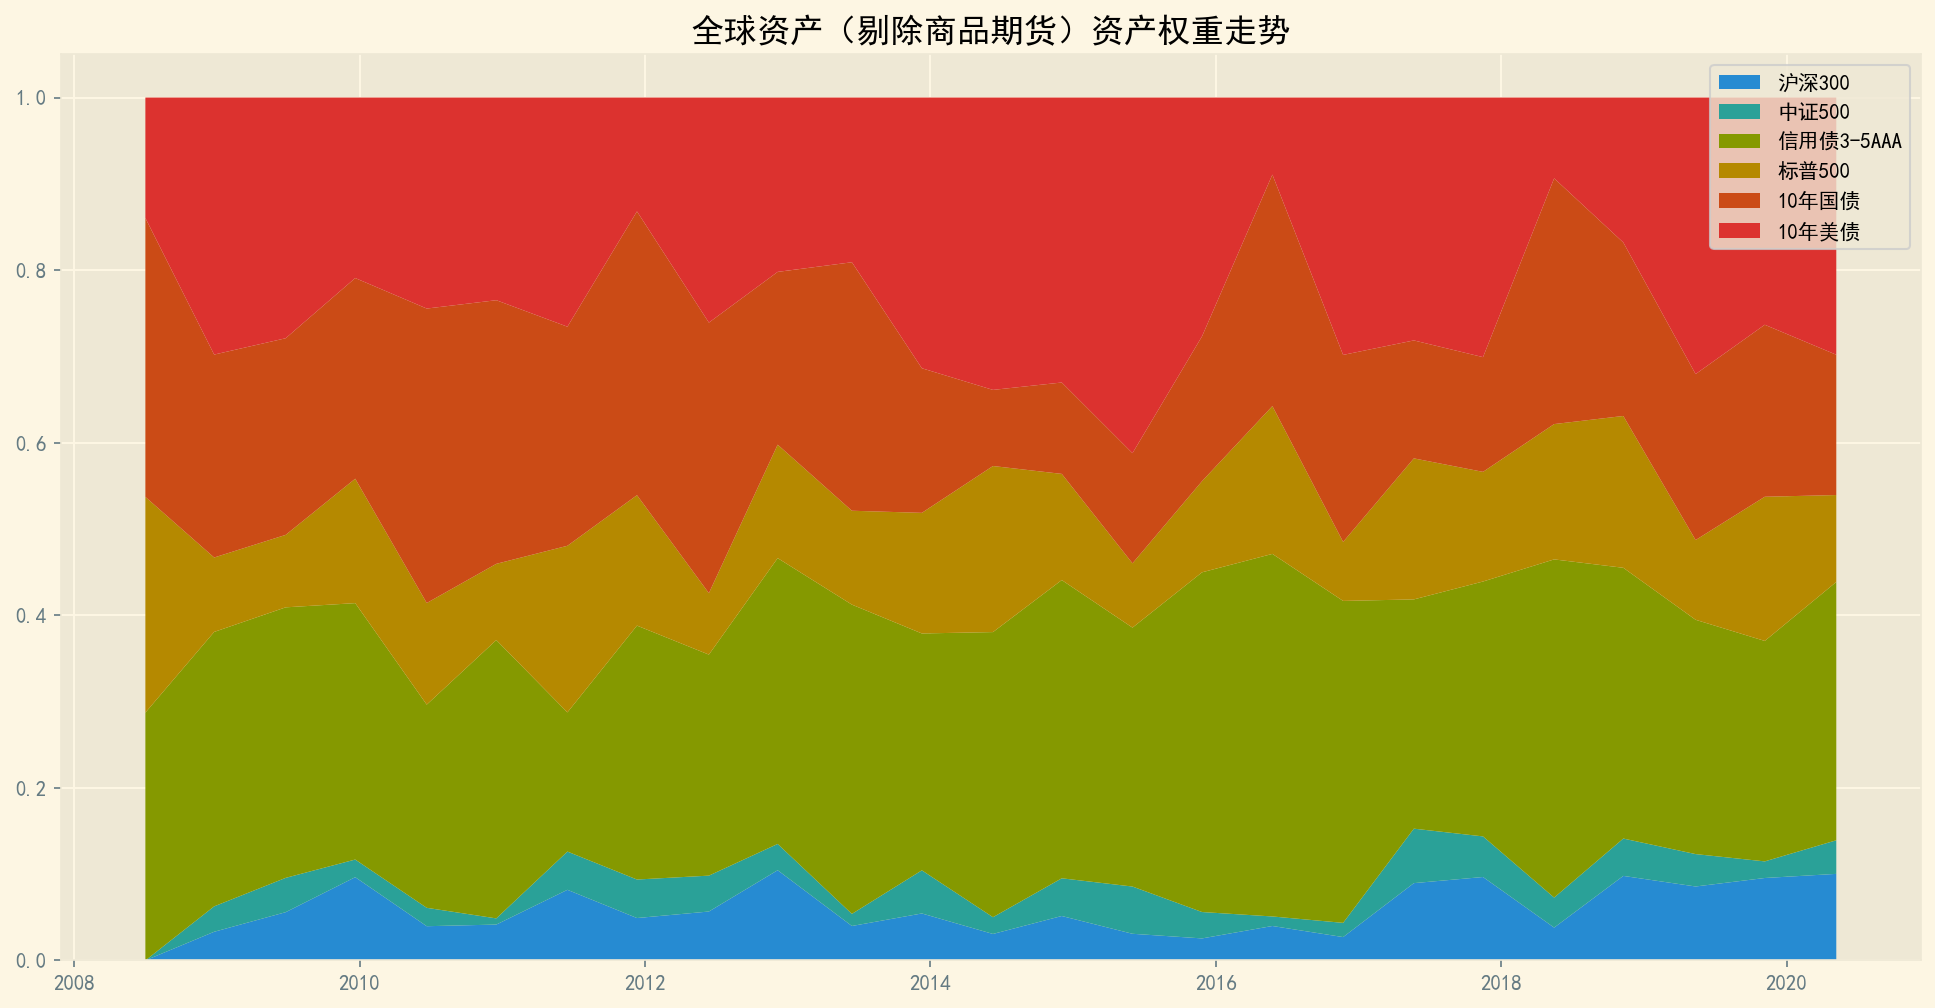

In [65]:
StatisticFunc.WeightPlot(tradeDF_D, weightDF_D, '全球资产（剔除商品期货）')

### 回测表现汇总

In [66]:
smryDF_D = StatisticFunc.summaryDF(tradeDF_D)
pfmcDF_D = StatisticFunc.performanceDF(smryDF_D, tradeDF_D, name='全球资产')

In [67]:
smryDF_D

,年收益率,年波动率,信息比,最大回撤
2008,0.217568,0.122966,1.769333,-0.041150
2009,0.036328,0.065437,0.555158,-0.043200
2010,0.052929,0.051411,1.029514,-0.069906
2011,0.070809,0.063259,1.119362,-0.080828
2012,0.057838,0.035499,1.629285,-0.038664
2013,-0.025055,0.050538,-0.495775,-0.120275
2014,0.179209,0.034071,5.259902,-0.119632
2015,0.157518,0.043930,3.585630,-0.031621
2016,0.076300,0.035836,2.129172,-0.069208
2017,-0.018099,0.026041,-0.695039,-0.081003


In [68]:
pfmcDF_D

,年化收益,年化波动率,最大回撤,最长不创新高时间,信息比,Calmar比率
全球资产,0.082169,0.051825,-0.120275,421.0,1.585513,0.683176


### 收益率贡献度

In [69]:
annualContrb_D = StatisticFunc.AnnualContribution(tradeDF_D)

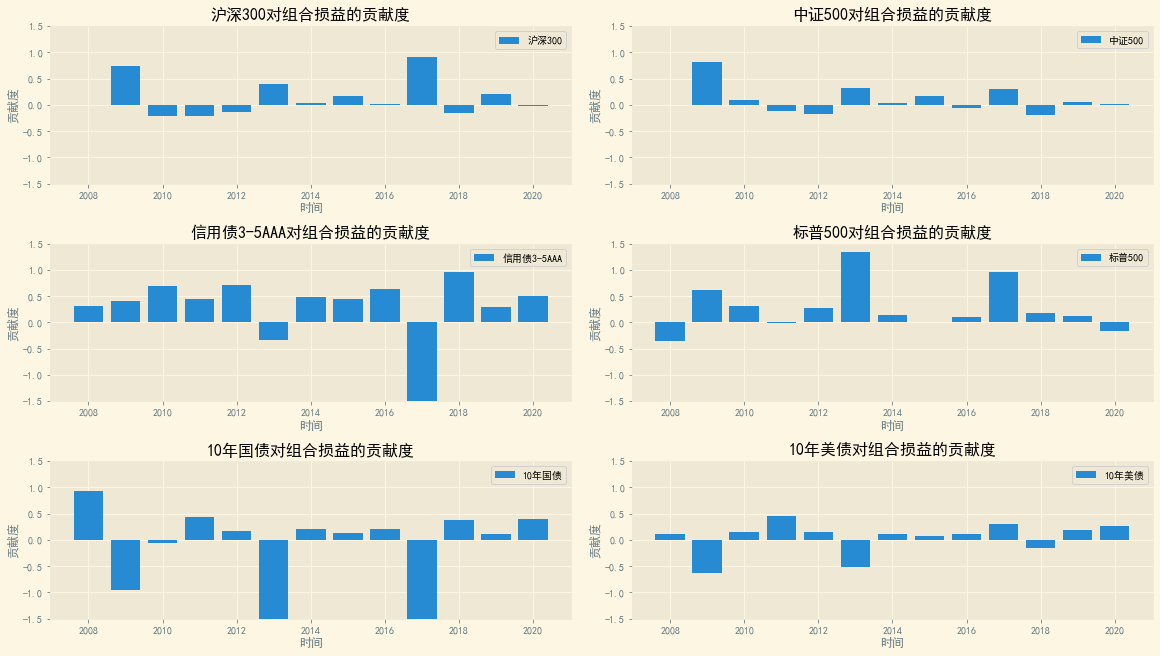

In [70]:
StatisticFunc.BarPlot(annualContrb_D, '全球资产（剔除部分商品期货）')

### 投资组合净值曲线

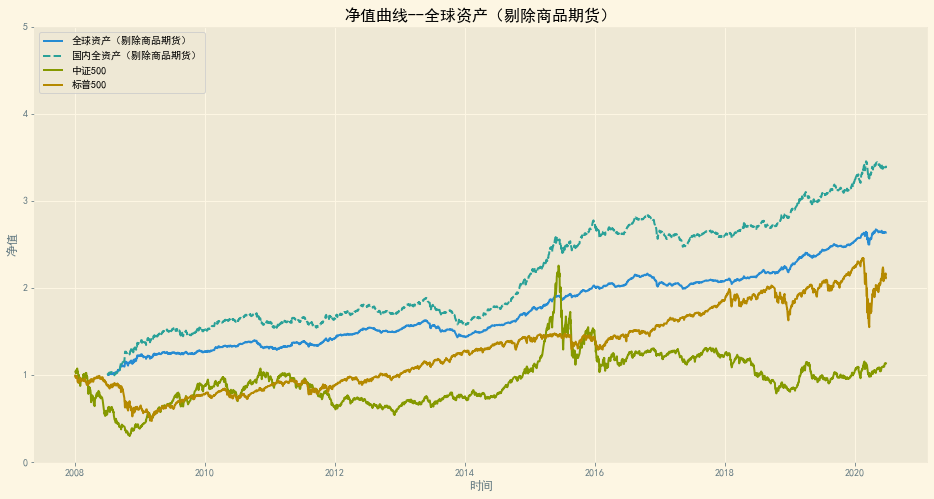

In [71]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF_D.index, tradeDF_D['投资组合净值']/10000, label='全球资产（剔除商品期货）')
    
plt.plot(tradeDF_C4.index, tradeDF_C4['投资组合净值']/10000, ls='--', label='国内全资产（剔除商品期货）')  
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['标普500'], label='标普500')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('净值曲线--全球资产（剔除商品期货）')
plt.savefig('Pics/净值曲线_全球资产（剔除商品期货）.png')

# 单因子和多因子的作用

## 单因子

- 横截面动量

### 程序运行

In [74]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':True, 'momentumT':False, 
            'reverseX':False, 'reverseT':False,
            'turnover':False, 'fxRate':False,
            'copperGold':False, 'copperGas':False}

tradeDF_single, weightDF_single = AlgoLoop.AlgoTrade(Assets, leverReturns_D, leverCumReturns_D, 
                                                     Turnovers, FXRates, mode='ema', dt=120, up=0.50, 
                                                     thresholds=thrds, factorDict=factors)

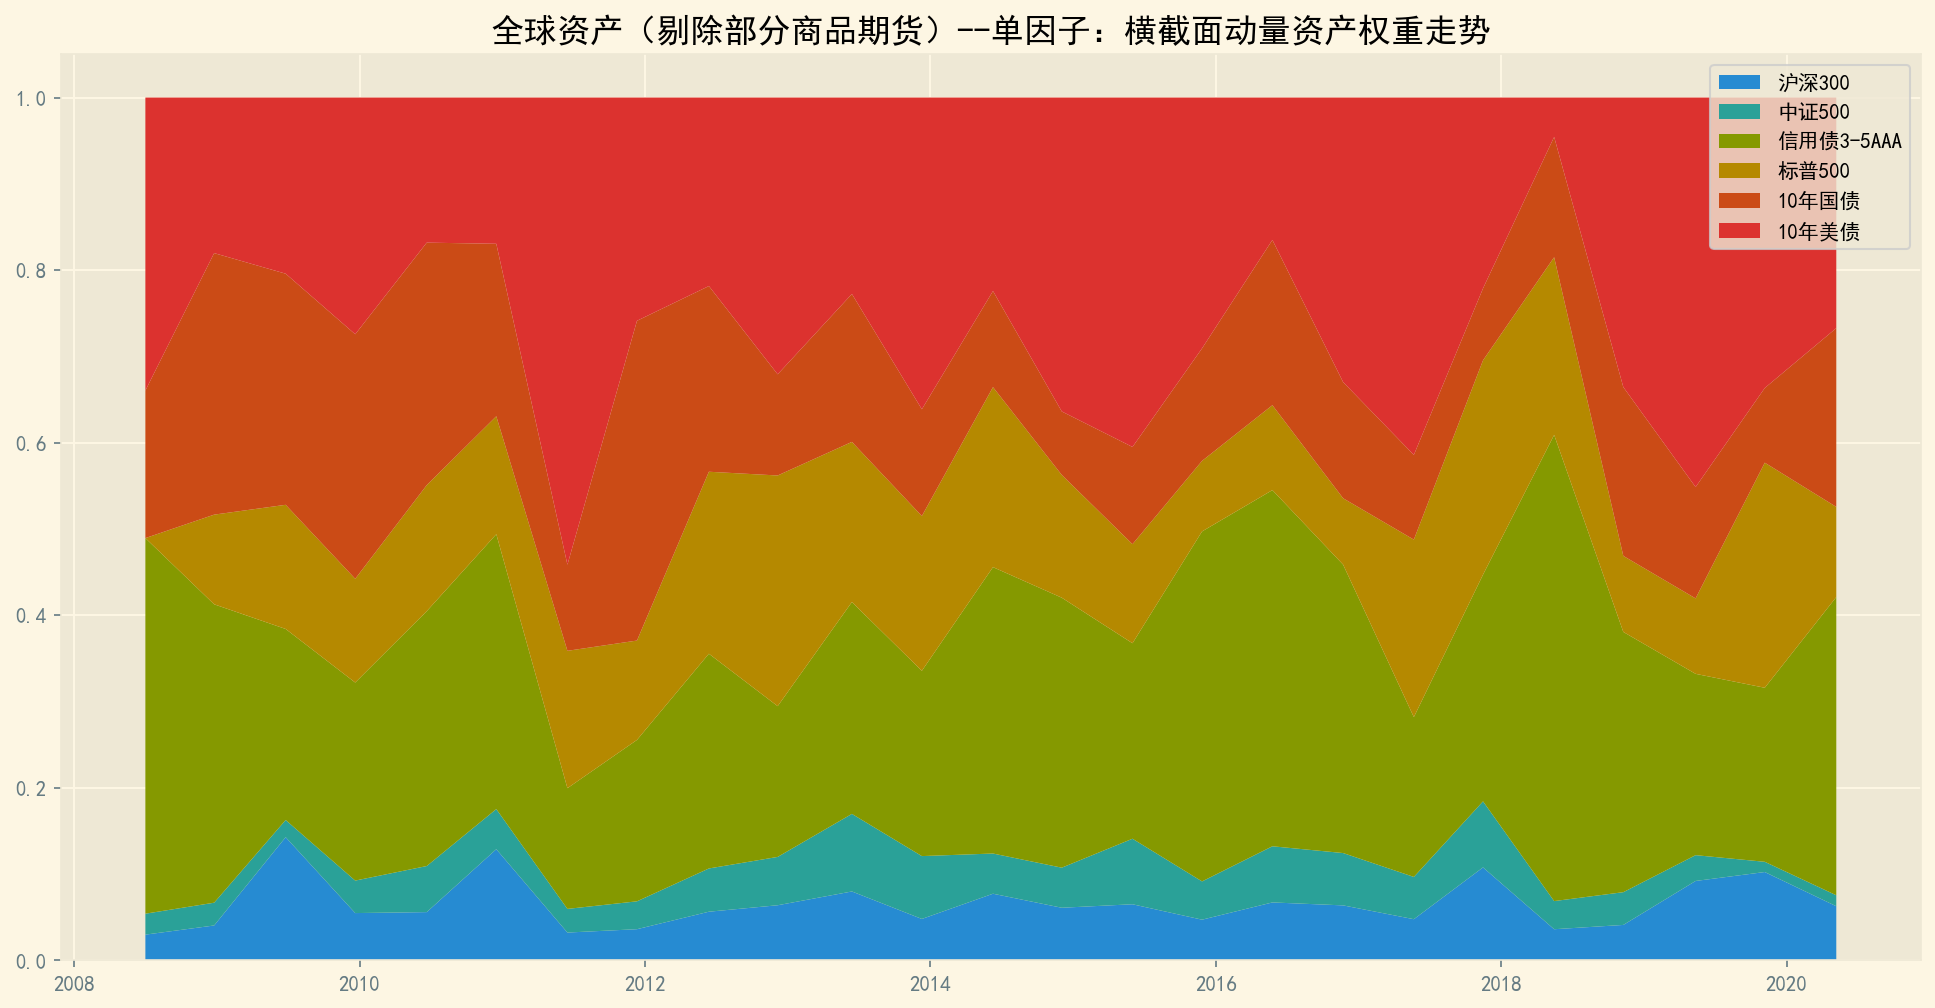

In [75]:
StatisticFunc.WeightPlot(tradeDF_single, weightDF_single, '全球资产（剔除部分商品期货）--单因子：横截面动量')

### 回测表现汇总

In [76]:
smryDF_single = StatisticFunc.summaryDF(tradeDF_single)
pfmcDF_single = StatisticFunc.performanceDF(smryDF_single, tradeDF_single, name='全球资产（单因子）')

In [77]:
smryDF_single

,年收益率,年波动率,信息比,最大回撤
2008,0.253988,0.100881,2.517699,-0.029079
2009,0.061503,0.075925,0.810059,-0.050367
2010,0.078398,0.052871,1.482823,-0.060817
2011,0.062991,0.057867,1.088551,-0.066131
2012,0.054530,0.036230,1.505097,-0.030460
2013,0.032235,0.053416,0.603475,-0.070793
2014,0.194876,0.036656,5.316420,-0.072111
2015,0.135009,0.055399,2.437030,-0.048827
2016,0.073543,0.037483,1.962040,-0.062618
2017,-0.014382,0.025801,-0.557412,-0.070873


In [78]:
pfmcDF_single

,年化收益,年化波动率,最大回撤,最长不创新高时间,信息比,Calmar比率
全球资产（单因子）,0.090418,0.054564,-0.086333,417.0,1.657103,1.047316


### 收益率贡献度

In [79]:
annualContrb_single = StatisticFunc.AnnualContribution(tradeDF_single)

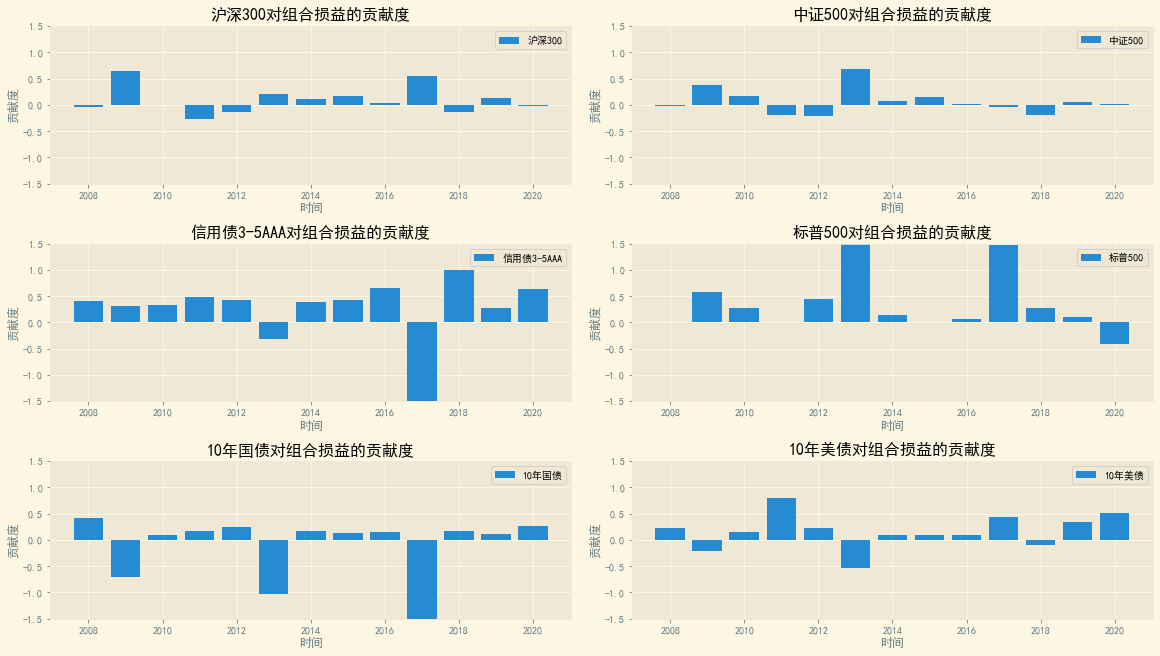

In [92]:
StatisticFunc.BarPlot(annualContrb_single, '全球资产（剔除商品期货）--单因子：横截面动量')

### 投资组合净值曲线

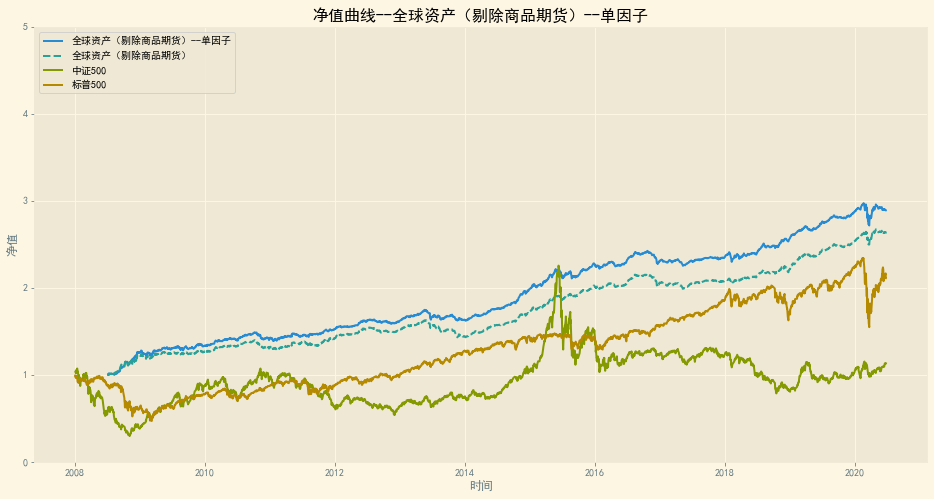

In [84]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF_single.index, tradeDF_single['投资组合净值']/10000, label='全球资产（剔除商品期货）--单因子')
        
# 基准参考
plt.plot(tradeDF_D.index, tradeDF_D['投资组合净值']/10000, ls='--', label='全球资产（剔除商品期货）')  
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['标普500'], label='标普500')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('净值曲线--全球资产（剔除商品期货）--单因子')
plt.savefig('Pics/净值曲线_全球资产（剔除商品期货）_单因子.png')

## 多因子

- 横截面动量+时序动量+换手率+铜金+铜油+汇率

### 程序运行

In [85]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':True, 'momentumT':False, 
            'reverseX':False, 'reverseT':False,
            'turnover':True, 'fxRate':True,
            'copperGold':True, 'copperGas':True}

tradeDF_multi, weightDF_multi = AlgoLoop.AlgoTrade(Assets, leverReturns_D, leverCumReturns_D, 
                                                   Turnovers, FXRates, mode='ema', dt=120, up=0.50, 
                                                   thresholds=thrds, factorDict=factors)

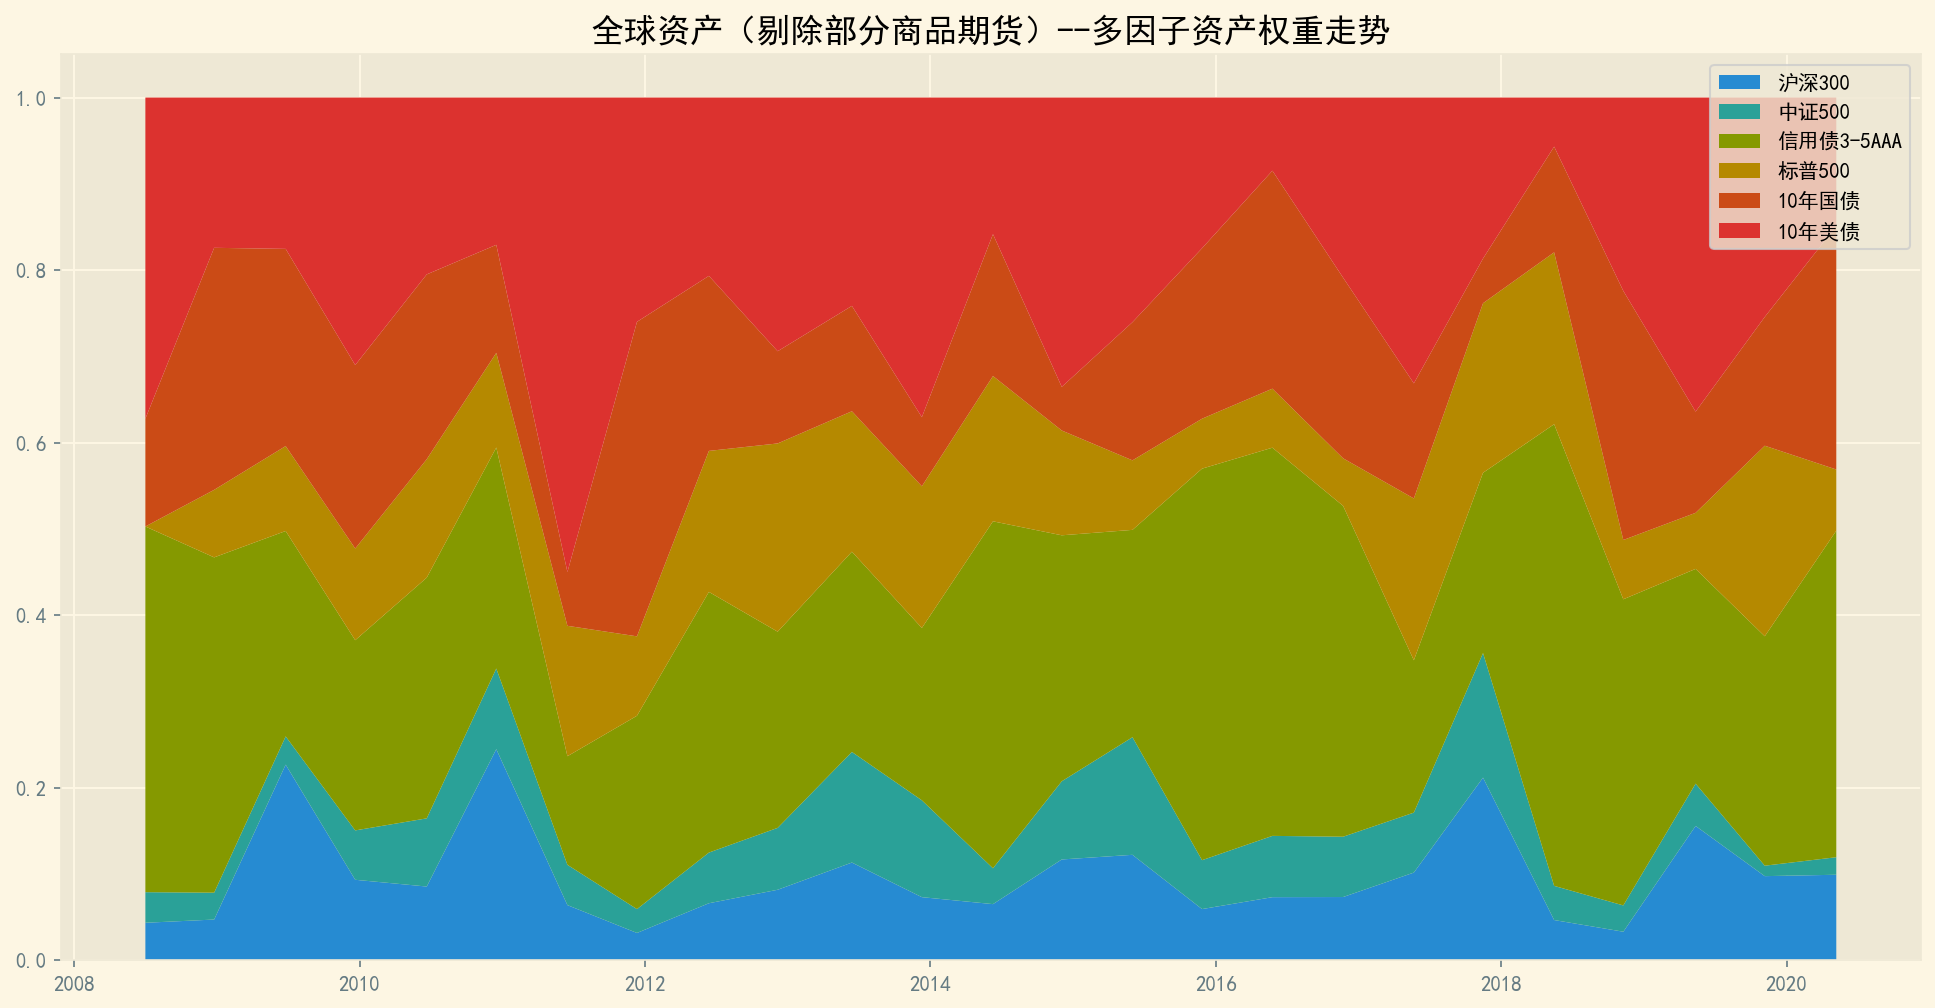

In [86]:
StatisticFunc.WeightPlot(tradeDF_multi, weightDF_multi, '全球资产（剔除部分商品期货）--多因子')

### 回测表现汇总

In [87]:
smryDF_multi = StatisticFunc.summaryDF(tradeDF_multi)
pfmcDF_multi = StatisticFunc.performanceDF(smryDF_multi, tradeDF_multi, name='全球资产（多因子）')

In [88]:
smryDF_multi

,年收益率,年波动率,信息比,最大回撤
2008,0.220650,0.099124,2.225993,-0.033087
2009,0.076428,0.090758,0.842105,-0.065730
2010,0.079885,0.059805,1.335757,-0.063168
2011,0.027514,0.066178,0.415751,-0.074805
2012,0.049946,0.036020,1.386604,-0.033462
2013,0.048022,0.059679,0.804679,-0.071108
2014,0.183017,0.043173,4.239204,-0.065359
2015,0.184019,0.090302,2.037817,-0.094335
2016,0.076430,0.043061,1.774951,-0.073743
2017,-0.025471,0.033511,-0.760077,-0.090754


In [89]:
pfmcDF_multi

,年化收益,年化波动率,最大回撤,最长不创新高时间,信息比,Calmar比率
全球资产（多因子）,0.088955,0.061353,-0.094335,438.0,1.449885,0.942972


### 收益率贡献度

In [90]:
annualContrb_multi = StatisticFunc.AnnualContribution(tradeDF_multi)

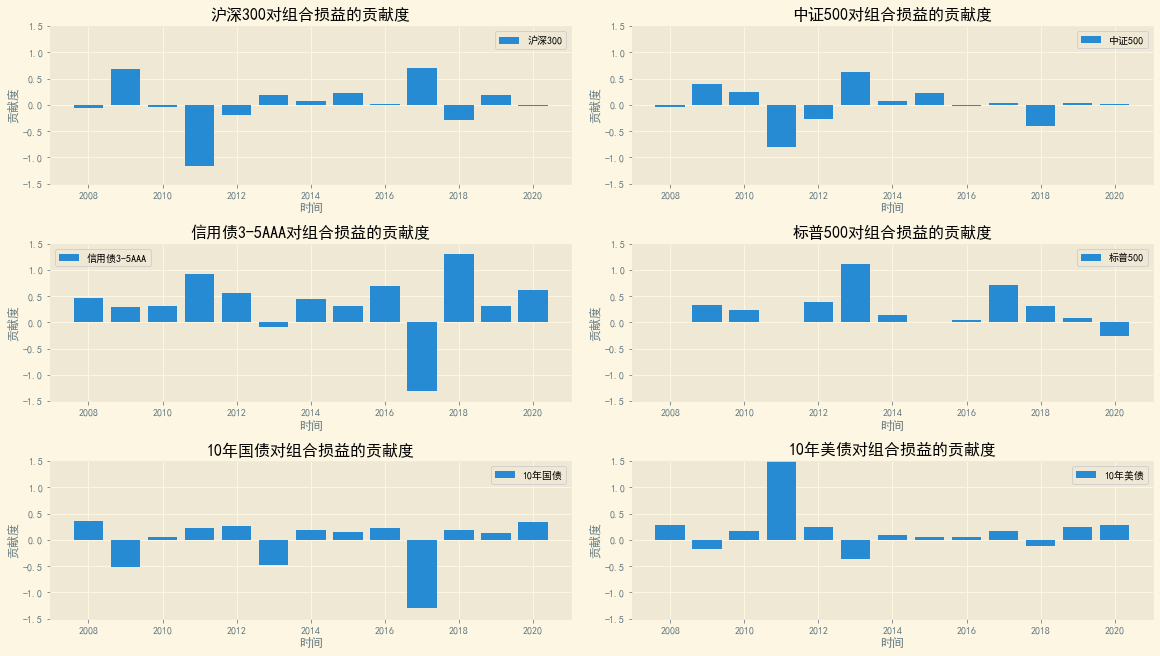

In [91]:
StatisticFunc.BarPlot(annualContrb_multi, '全球资产（剔除商品期货）--多因子')

### 投资组合净值曲线

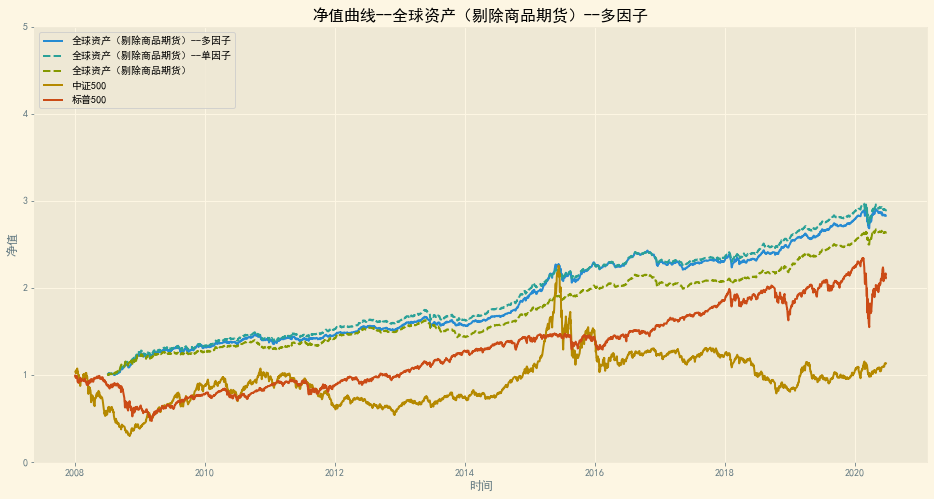

In [95]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF_multi.index, tradeDF_multi['投资组合净值']/10000, label='全球资产（剔除商品期货）--多因子')
        
# 基准参考
plt.plot(tradeDF_single.index, tradeDF_single['投资组合净值']/10000, ls='--', label='全球资产（剔除商品期货）--单因子')   
plt.plot(tradeDF_D.index, tradeDF_D['投资组合净值']/10000, ls='--', label='全球资产（剔除商品期货）')    
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['标普500'], label='标普500')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('净值曲线--全球资产（剔除商品期货）--多因子')
plt.savefig('Pics/净值曲线_全球资产（剔除商品期货）_多因子.png')

# 模型结果对流动性的依赖